In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [5]:
df= pd.read_csv('/Users/priyankamishrapandey/Downloads/Social+Media+Data+for+DSBA.csv')

In [6]:
df.head(10)

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   
5  1000006            No                           240.0              iOS   
6  1000007            No                             NaN  iOS and Android   
7  1000008            No                           225.0  iOS and Android   
8  1000009            No                           285.0              iOS   
9  1000010            No                           270.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   
5                                  35175.0                              1   
6                                  46340.0                              1   
7                                      NaN                             24   
8                                   7560.0                             23   
9                                  45465.0                             27   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   
5                2               Financial                               79.0   
6            Three                 Medical                               81.0   
7                1               Financial                               67.0   
8                3               Financial                               44.0   
9                3                     NaN                               94.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   
5                                          3068   
6                                          2670   
7                                          2693   
8                                          9526   
9                                          5237   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   
5                                   0                     No   
6                                   4                    Yes   
7                                   1                     No   
8                                   0                     No   
9                                   6                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                  

# understanding if we have the right data by checking the first 10 columns of the data

In [7]:
df.tail(10)

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
11750  1011751            No                           231.0              Tab   
11751  1011752           Yes                           383.0              Tab   
11752  1011753            No                           302.0              Tab   
11753  1011754            No                           247.0           Mobile   
11754  1011755            No                           210.0              Tab   
11755  1011756            No                           279.0           Laptop   
11756  1011757            No                           305.0              Tab   
11757  1011758            No                           214.0              Tab   
11758  1011759            No                           382.0           Laptop   
11759  1011760            No                           270.0              Tab   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
11750                                  16423.0                             28   
11751                                  14399.0                             28   
11752                                  25317.0                             24   
11753                                  11418.0                              5   
11754                                  40886.0                              5   
11755                                  30987.0                             23   
11756                                  21510.0                              6   
11757                                   5478.0                              4   
11758                                  35851.0                              2   
11759                                  22025.0                              8   

      member_in_family preferred_location_type  \
11750                4         Historical site   
11751                3              Big Cities   
11752                1              Big Cities   
11753                3         Historical site   
11754                3                   Other   
11755                2         Historical site   
11756                1         Historical site   
11757                3                   Beach   
11758                3         Historical site   
11759                3         Historical site   

       Yearly_avg_comment_on_travel_page  \
11750                               96.0   
11751                               58.0   
11752                               79.0   
11753                               99.0   
11754                               53.0   
11755                               58.0   
11756                               55.0   
11757                              103.0   
11758                               83.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
11750                                          3845   
11751                                         10910   
11752                                         12093   
11753                                          9983   
11754                                          3024   
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
11750                                   1                     No   
11751                                   6                    Yes   
11752                                   0                     No   
11753                                   1                     No   
11754                                   2                     No   
11755                                   4                     No   
11756                                   4                     No   
11757                                 

# understanding the last few rows and columns of our data

In [8]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

# checking the total null values in the data

In [10]:
df.info()    #checking the datatype, non null and count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [11]:
df.describe()  #understanding data's stats- mean, std, min and max etc

UserID  Yearly_avg_view_on_travel_page  \
count  1.176000e+04                    11179.000000   
mean   1.005880e+06                      280.830844   
std    3.394964e+03                       68.182958   
min    1.000001e+06                       35.000000   
25%    1.002941e+06                      232.000000   
50%    1.005880e+06                      271.000000   
75%    1.008820e+06                      324.000000   
max    1.011760e+06                      464.000000   

       total_likes_on_outstation_checkin_given  \
count                             11379.000000   
mean                              28170.481765   
std                               14385.032134   
min                                3570.000000   
25%                               16380.000000   
50%                               28076.000000   
75%                               40525.000000   
max                              252430.000000   

       Yearly_avg_comment_on_travel_page  \
count                       11554.000000   
mean                           74.790029   
std                            24.026650   
min                             3.000000   
25%                            57.000000   
50%                            75.000000   
75%                            92.000000   
max                           815.000000   

       total_likes_on_outofstation_checkin_received  \
count                                  11760.000000   
mean                                    6531.699065   
std                                     4706.613785   
min                                     1009.000000   
25%                                     2940.750000   
50%                                     4948.000000   
75%                                     8393.250000   
max                                    20065.000000   

       week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
count                        11760.000000                        11760.000000   
mean                             3.203571                           28.661565   
std                              2.616365                           48.660504   
min                              0.000000                           11.000000   
25%                              1.000000                           17.000000   
50%                              3.000000                           22.000000   
75%                              5.000000                           27.000000   
max                             11.000000                          500.000000   

       travelling_network_rating    Adult_flag  \
count               11760.000000  11760.000000   
mean                    2.712245      0.793878   
std                     1.080887      0.851823   
min                     1.000000      0.000000   
25%                     2.000000      0.000000   
50%                     3.000000      1.000000   
75%                     4.000000      1.000000   
max                     4.000000      3.000000   

       Daily_Avg_mins_spend_on_traveling_page  
count                            11760.000000  
mean                                13.817432  
std                                  9.070657  
min                                  0.000000  
25%                                  8.000000  
50%                                 12.000000  
75%                                 18.000000  
max                                270.000000

# Since, this is a small dataset and has very less null values which is >10% 
#we will not remove any values from the dataset

In [12]:
df.nunique()

UserID                                          11760
Taken_product                                       2
Yearly_avg_view_on_travel_page                    331
preferred_device                                   10
total_likes_on_outstation_checkin_given          7888
yearly_avg_Outstation_checkins                     30
member_in_family                                    7
preferred_location_type                            15
Yearly_avg_comment_on_travel_page                 100
total_likes_on_outofstation_checkin_received     6288
week_since_last_outstation_checkin                 12
following_company_page                              4
montly_avg_comment_on_company_page                160
working_flag                                        2
travelling_network_rating                           4
Adult_flag                                          4
Daily_Avg_mins_spend_on_traveling_page             52
dtype: int64

In [13]:
df.shape #shape of the data

(11760, 17)

In [14]:
df.isnull() #checking if dataset has any null values

UserID  Taken_product  Yearly_avg_view_on_travel_page  \
0       False          False                           False   
1       False          False                           False   
2       False          False                           False   
3       False          False                           False   
4       False          False                           False   
...       ...            ...                             ...   
11755   False          False                           False   
11756   False          False                           False   
11757   False          False                           False   
11758   False          False                           False   
11759   False          False                           False   

       preferred_device  total_likes_on_outstation_checkin_given  \
0                 False                                    False   
1                 False                                    False   
2                 False                                    False   
3                 False                                    False   
4                 False                                    False   
...                 ...                                      ...   
11755             False                                    False   
11756             False                                    False   
11757             False                                    False   
11758             False                                    False   
11759             False                                    False   

       yearly_avg_Outstation_checkins  member_in_family  \
0                               False             False   
1                               False             False   
2                               False             False   
3                               False             False   
4                               False             False   
...                               ...               ...   
11755                           False             False   
11756                           False             False   
11757                           False             False   
11758                           False             False   
11759                           False             False   

       preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                        False                              False   
1                        False                              False   
2                        False                              False   
3                        False                              False   
4                        False                              False   
...                        ...                                ...   
11755                    False                              False   
11756                    False                              False   
11757                    False                              False   
11758                    False                              False   
11759                    False                              False   

       total_likes_on_outofstation_checkin_received  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
11755                                         False   
11756                                         False   
11757                                         False   
11758                                         False   
11759                                         False   

       week_since_last_outstation_checkin  following_company_page  \
0                                   False                   False   
1                                   False                   False   
2              

In [15]:
df.isnull().sum() #checking total null values for better understanding

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [16]:
(df.isnull().sum()/(len(df)))*100  #check the percentage

UserID                                          0.000000
Taken_product                                   0.000000
Yearly_avg_view_on_travel_page                  4.940476
preferred_device                                0.450680
total_likes_on_outstation_checkin_given         3.239796
yearly_avg_Outstation_checkins                  0.637755
member_in_family                                0.000000
preferred_location_type                         0.263605
Yearly_avg_comment_on_travel_page               1.751701
total_likes_on_outofstation_checkin_received    0.000000
week_since_last_outstation_checkin              0.000000
following_company_page                          0.875850
montly_avg_comment_on_company_page              0.000000
working_flag                                    0.000000
travelling_network_rating                       0.000000
Adult_flag                                      0.000000
Daily_Avg_mins_spend_on_traveling_page          0.000000
dtype: float64

### Columns with a very high percentage of missing values might be candidates for removal from the dataset, especially if they are not essential for subsequent analyses.
##### For columns with a moderate percentage of missing values, decisions need to be made about imputing (filling in) these values. The strategy for imputation could be based on mean, median, mode, forward-fill, backward-fill, or more advanced techniques like regression or machine learning-based imputation

## Since, this is a small dataset and has very less null values which is >10% we will not remove any values from the dataset, rather use KNN to impute missing values and replace them with new values

### Checking unique values in dataset and further manipulating them for analysis

In [17]:
df['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [19]:
df['total_likes_on_outstation_checkin_given' ].unique()

array([38570.,  9765., 48055., ...,  5478., 35851., 22025.])

In [20]:
df['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [21]:
df['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
       'Beach', 'Historical site', 'Big Cities', 'Trekking',
       'Hill Stations'], dtype=object)

In [16]:
from sklearn.impute import KNNImputer

# treating the null values using knn from sklearn
#Applying KNNimputer on the following columns only Yearly_avg_view_on_travel_page, total_likes_on_outstation_checkin_given , Yearly_avg_comment_on_travel_page

# # imputing the float
#Applying KNNimputer on the following columns only Yearly_avg_view_on_travel_page, total_likes_on_outstation_checkin_given , Yearly_avg_comment_on_travel_page


In [17]:
import pandas as pd
from sklearn.impute import KNNImputer

# Sample data, assuming your DataFrame is named df

# Extract columns to be imputed
columns_to_impute = [
    'Yearly_avg_view_on_travel_page',
    'total_likes_on_outstation_checkin_given',
    'Yearly_avg_comment_on_travel_page'
]
subset_df = df[columns_to_impute]

# Apply KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(subset_df)

# Replace original columns with imputed data
df[columns_to_impute] = imputed_data

print(df)


        UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001           Yes                           307.0  iOS and Android   
1      1000002            No                           367.0              iOS   
2      1000003           Yes                           277.0  iOS and Android   
3      1000004            No                           247.0              iOS   
4      1000005            No                           202.0  iOS and Android   
...        ...           ...                             ...              ...   
11755  1011756            No                           279.0           Laptop   
11756  1011757            No                           305.0              Tab   
11757  1011758            No                           214.0              Tab   
11758  1011759            No                           382.0           Laptop   
11759  1011760            No                           270.0              Tab   

       total_likes_on_outst

In [18]:
from sklearn.impute import KNNImputer

# Specify the columns to impute
columns_to_impute = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'Yearly_avg_comment_on_travel_page']

# Initialize the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=3)

# Impute the missing values
data_imputed = knn_imputer.fit_transform(df[columns_to_impute])

# Create a DataFrame with imputed values
data_imputed = pd.DataFrame(data_imputed, columns=columns_to_impute)

# Check for any remaining missing values
missing_values = data_imputed.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

Yearly_avg_view_on_travel_page             0
total_likes_on_outstation_checkin_given    0
Yearly_avg_comment_on_travel_page          0
dtype: int64


In [19]:
#Defining the mapping for replacements
device_mapping = {
    'iOS and Android': 'Mobile',
    'ANDROID': 'Mobile',
    'iOS': 'Mobile',
    'Tab': 'Mobile',
    'Mobile': 'Mobile',
    'Laptop': 'Laptop',
    'Others': 'Mobile',
    'Other': 'Mobile'
}

#Replace values in 'preferred_device' column
df['preferred_device'] = df['preferred_device'].replace(device_mapping)

print(df)


        UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001           Yes                           307.0           Mobile   
1      1000002            No                           367.0           Mobile   
2      1000003           Yes                           277.0           Mobile   
3      1000004            No                           247.0           Mobile   
4      1000005            No                           202.0           Mobile   
...        ...           ...                             ...              ...   
11755  1011756            No                           279.0           Laptop   
11756  1011757            No                           305.0           Mobile   
11757  1011758            No                           214.0           Mobile   
11758  1011759            No                           382.0           Laptop   
11759  1011760            No                           270.0           Mobile   

       total_likes_on_outst

In [20]:
df.yearly_avg_Outstation_checkins.value_counts()

yearly_avg_Outstation_checkins
1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: count, dtype: int64

In [21]:
df.preferred_device  ##checking if changes are made

0        Mobile
1        Mobile
2        Mobile
3        Mobile
4        Mobile
          ...  
11755    Laptop
11756    Mobile
11757    Mobile
11758    Laptop
11759    Mobile
Name: preferred_device, Length: 11760, dtype: object

# Now, checking individual columns to see which columns are categorical and which ones are numerical, also treating categorical columns by encoding them.

# changing categorical values to numerical values in the data set

In [22]:
df.preferred_location_type.value_counts()

preferred_location_type
Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: count, dtype: int64

In [23]:
df.Taken_product.value_counts() ##understanding how many 'yes' and 'no' are there in the product taken column

Taken_product
No     9864
Yes    1896
Name: count, dtype: int64

In [24]:
df.member_in_family.value_counts() 

member_in_family
3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: count, dtype: int64

In [25]:
df['member_in_family'] = df['member_in_family'].replace('Three', 3).astype(int)
df['member_in_family']

0        2
1        1
2        2
3        4
4        1
        ..
11755    2
11756    1
11757    3
11758    3
11759    3
Name: member_in_family, Length: 11760, dtype: int64

# # Convert 'working_flag' to 0 and 1

In [26]:
df.working_flag.value_counts()

working_flag
No     9952
Yes    1808
Name: count, dtype: int64

In [27]:
df['working_flag'] = df['working_flag'].map({'Yes': 1, 'No': 0})

In [28]:
print(df['working_flag'])

0        0
1        1
2        0
3        0
4        0
        ..
11755    0
11756    0
11757    1
11758    0
11759    0
Name: working_flag, Length: 11760, dtype: int64


In [29]:
df.preferred_location_type.value_counts()

preferred_location_type
Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: count, dtype: int64

In [30]:
df.following_company_page.value_counts() ##convert categorical values to 1 and 0

following_company_page
No     8355
Yes    3285
1        12
0         5
Name: count, dtype: int64

In [31]:
df['following_company_page']=df['following_company_page'].map({'Yes':1, 'No':0})

In [32]:
df['following_company_page'].fillna(0, inplace=True)
df.following_company_page.value_counts()

following_company_page
0.0    8475
1.0    3285
Name: count, dtype: int64

In [33]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*', 3)

In [34]:
mobile_df = df[df['preferred_device'] == 'Mobile']

print(mobile_df)

        UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001           Yes                           307.0           Mobile   
1      1000002            No                           367.0           Mobile   
2      1000003           Yes                           277.0           Mobile   
3      1000004            No                           247.0           Mobile   
4      1000005            No                           202.0           Mobile   
...        ...           ...                             ...              ...   
11753  1011754            No                           247.0           Mobile   
11754  1011755            No                           210.0           Mobile   
11756  1011757            No                           305.0           Mobile   
11757  1011758            No                           214.0           Mobile   
11759  1011760            No                           270.0           Mobile   

       total_likes_on_outst

In [35]:
laptop_df =df[df['preferred_device']== 'Laptop']

In [36]:
print(laptop_df)

        UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
5881   1005882            No                           379.0           Laptop   
5883   1005884            No                           255.0           Laptop   
5885   1005886            No                           250.0           Laptop   
5888   1005889            No                           295.0           Laptop   
5906   1005907           Yes                           250.0           Laptop   
...        ...           ...                             ...              ...   
11730  1011731            No                           278.0           Laptop   
11742  1011743           Yes                           388.0           Laptop   
11746  1011747            No                           268.0           Laptop   
11755  1011756            No                           279.0           Laptop   
11758  1011759            No                           382.0           Laptop   

       total_likes_on_outst

# EDA FOR MOBILE AND LAPTOP
###MOBILE

In [37]:
mobile_df.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0           Mobile   
1  1000002            No                           367.0           Mobile   
2  1000003           Yes                           277.0           Mobile   
3  1000004            No                           247.0           Mobile   
4  1000005            No                           202.0           Mobile   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

   member_in_family preferred_location_type  \
0                 2               Financial   
1                 1               Financial   
2                 2                   Other   
3                 4               Financial   
4                 1                 Medical   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                     1.0   
1                                   1                     0.0   
2                                   6                     1.0   
3                                   1                     1.0   
4                                   9                     0.0   

   montly_avg_comment_on_company_page  working_flag  \
0                                  11             0   
1                                  23             1   
2                                  15             0   
3                                  11             0   
4                                  12             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

In [38]:
mobile_df.describe() #understanding any outliers

UserID  Yearly_avg_view_on_travel_page  \
count  1.013900e+04                    10139.000000   
mean   1.005683e+06                      280.603626   
std    3.416274e+03                       67.618724   
min    1.000001e+06                       35.000000   
25%    1.002704e+06                      232.000000   
50%    1.005543e+06                      271.000000   
75%    1.008638e+06                      322.000000   
max    1.011760e+06                      464.000000   

       total_likes_on_outstation_checkin_given  member_in_family  \
count                             10139.000000      10139.000000   
mean                              28246.725661          2.922280   
std                               14406.778144          1.042818   
min                                3570.000000          1.000000   
25%                               16452.000000          2.000000   
50%                               28214.000000          3.000000   
75%                               40395.000000          4.000000   
max                              252430.000000         10.000000   

       Yearly_avg_comment_on_travel_page  \
count                       10139.000000   
mean                           74.587743   
std                            24.260305   
min                             3.000000   
25%                            57.000000   
50%                            74.000000   
75%                            92.000000   
max                           815.000000   

       total_likes_on_outofstation_checkin_received  \
count                                  10139.000000   
mean                                    6574.235526   
std                                     4750.190118   
min                                     1009.000000   
25%                                     2943.000000   
50%                                     4960.000000   
75%                                     8421.500000   
max                                    20065.000000   

       week_since_last_outstation_checkin  following_company_page  \
count                        10139.000000            10139.000000   
mean                             3.219154                0.278134   
std                              2.620184                0.448102   
min                              0.000000                0.000000   
25%                              1.000000                0.000000   
50%                              3.000000                0.000000   
75%                              5.000000                1.000000   
max                             11.000000                1.000000   

       montly_avg_comment_on_company_page  working_flag  \
count                        10139.000000  10139.000000   
mean                            28.539895      0.151790   
std                             49.222125      0.358835   
min                             11.000000      0.000000   
25%                             17.000000      0.000000   
50%                             22.000000      0.000000   
75%                             27.000000      0.000000   
max                            500.000000      1.000000   

       travelling_network_rating    Adult_flag  \
count               10139.000000  10139.000000   
mean                    2.702535      0.794260   
std                     1.081181      0.852209   
min                     1.000000      0.000000   
25%                     2.000000      0.000000   
50%                     3.000000      1.000000   
75%                     4.000000      1.000000   
max                     4.000000      3.000000   

       Daily_Avg_mins_spend_on_traveling_page  
count                            10139.000000  
mean                                13.835289  
std                                  9.207698  
min                                  0.000000  
25%                                  8.000000  
50%                                 12.000000  
75%                                 18.000000  
max                   

# Univariate analysis

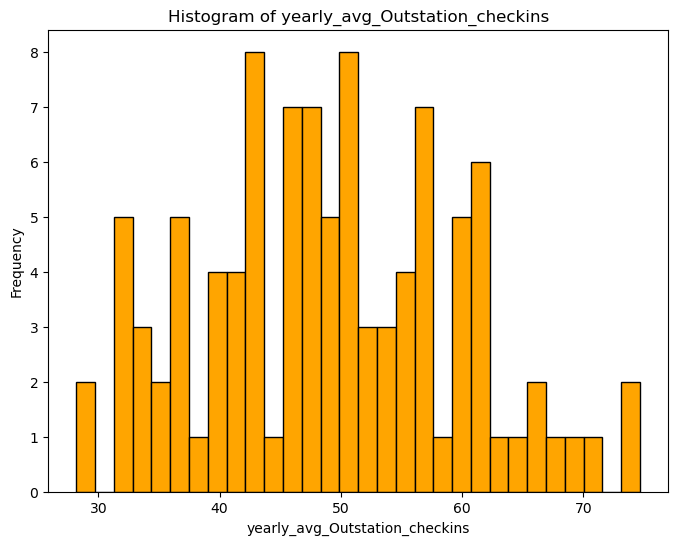

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic float data
data = np.random.normal(loc=50, scale=10, size=100)

# Create a DataFrame
df = pd.DataFrame({'yearly_avg_Outstation_checkins': data})

# Create a histogram with more bins (e.g., 30 bins)
plt.figure(figsize=(8, 6))
plt.hist(df['yearly_avg_Outstation_checkins'], bins=30, color='orange', edgecolor='black')

plt.title('Histogram of yearly_avg_Outstation_checkins')
plt.xlabel('yearly_avg_Outstation_checkins')
plt.ylabel('Frequency')
plt.show()


##### Observation: Average number of out of station check-in done by user are more than 10 users

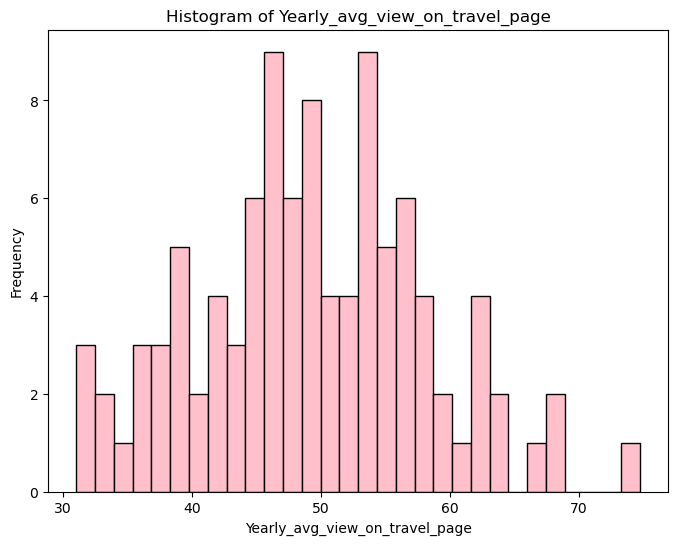

In [40]:
# Generate synthetic float data
data = np.random.normal(loc=50, scale=10, size=100)

# Create a DataFrame
df = pd.DataFrame({'Yearly_avg_view_on_travel_page': data})

# Create a histogram with more bins (e.g., 30 bins)
plt.figure(figsize=(8, 6))
plt.hist(df['Yearly_avg_view_on_travel_page'], bins=30, color='Pink', edgecolor='black')

plt.title('Histogram of Yearly_avg_view_on_travel_page')
plt.xlabel('Yearly_avg_view_on_travel_page')
plt.ylabel('Frequency')
plt.show()

 ##### Observation: Average yearly views on any travel related page by user are approx 10 times by 48 to 54 users

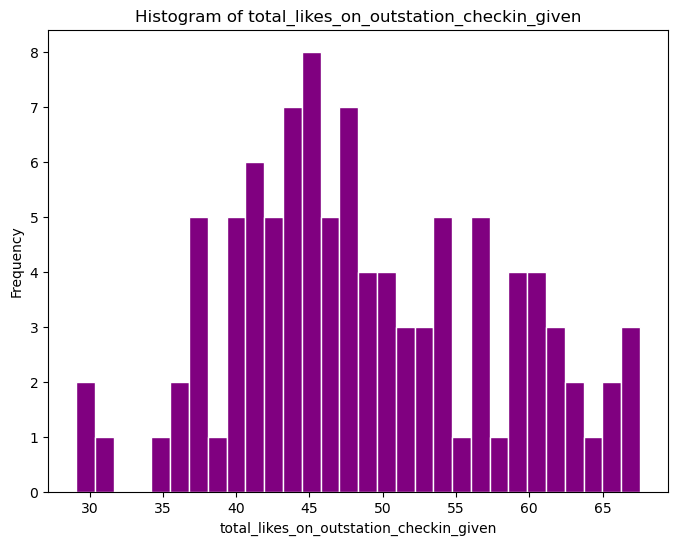

In [41]:
# Generate synthetic float data
data = np.random.normal(loc=50, scale=10, size=100)

# Create a DataFrame
df = pd.DataFrame({'total_likes_on_outstation_checkin_given': data})

# Create a histogram with more bins (e.g., 30 bins)
plt.figure(figsize=(8, 6))
plt.hist(df['total_likes_on_outstation_checkin_given'], bins=30, color='purple', edgecolor='white')

plt.title('Histogram of total_likes_on_outstation_checkin_given')
plt.xlabel('total_likes_on_outstation_checkin_given')
plt.ylabel('Frequency')
plt.show()

##### Observation:Total number of likes given by a user on out of station  checkings in last year ranges more than 10 times by 52 to 54 users

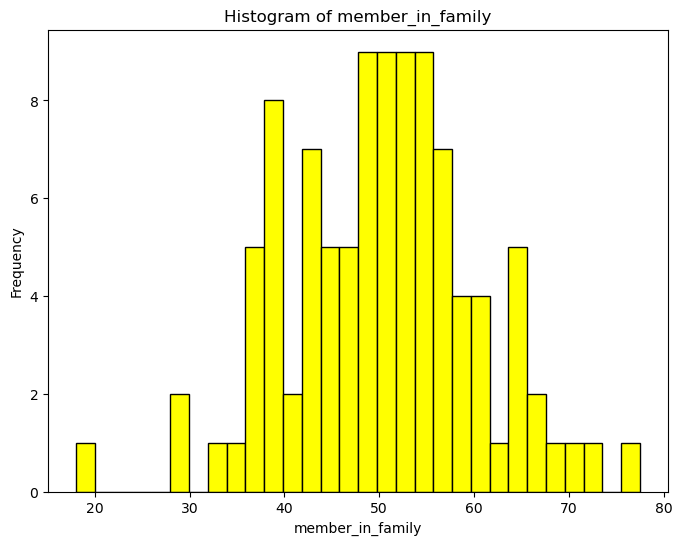

In [42]:
# Generate synthetic float data
data = np.random.normal(loc=50, scale=10, size=100)

# Create a DataFrame
df = pd.DataFrame({'member_in_family': data})

# Create a histogram with more bins (e.g., 30 bins)
plt.figure(figsize=(8, 6))
plt.hist(df['member_in_family'], bins=30, color='yellow', edgecolor='black')

plt.title('Histogram of member_in_family')
plt.xlabel('member_in_family')
plt.ylabel('Frequency')
plt.show()

###### Observation:Total number of relationship mentioned by user in the  account is max of 7 and min of 1

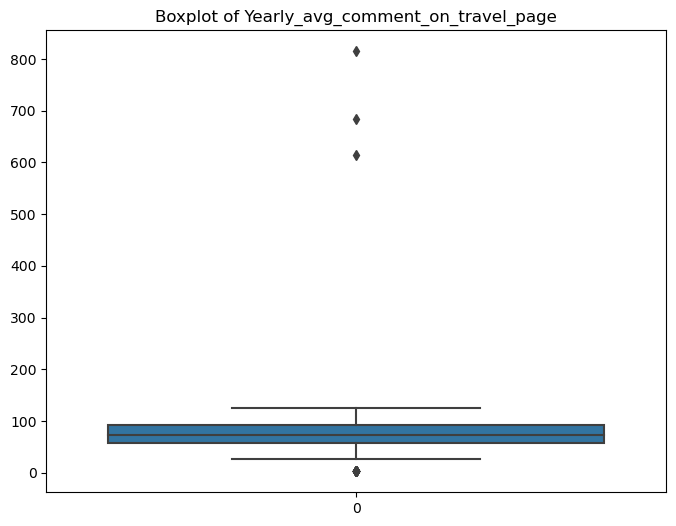

In [43]:

#Boxplot for 'Yearly_avg_comment_on_travel_page' column

plt.figure(figsize=(8, 6))
sns.boxplot(mobile_df['Yearly_avg_comment_on_travel_page'])
plt.title('Boxplot of Yearly_avg_comment_on_travel_page')
plt.show()

#### Yearly_avg_comment_on_travel_page has some outliners- there is an unusually high value which could mean that user is exceptionally active or perhaps spamming the platform.


#### Bivariate analysis

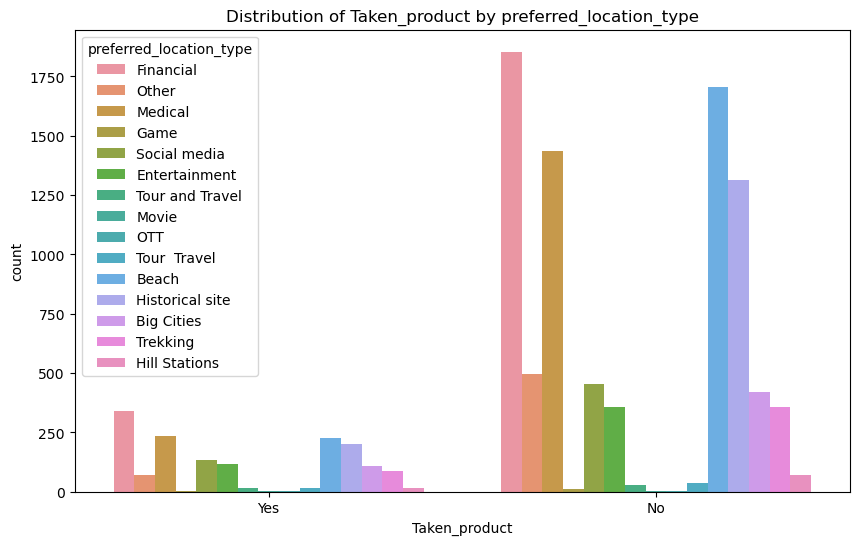

In [44]:
categorical_vars = ['preferred_location_type']  # add other categorical variables

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=mobile_df, x='Taken_product', hue=var)
    plt.title(f'Distribution of Taken_product by {var}')
    plt.show()

##### Observation: most of the people took this tourism for financial purposes, follwed by medical purposes.

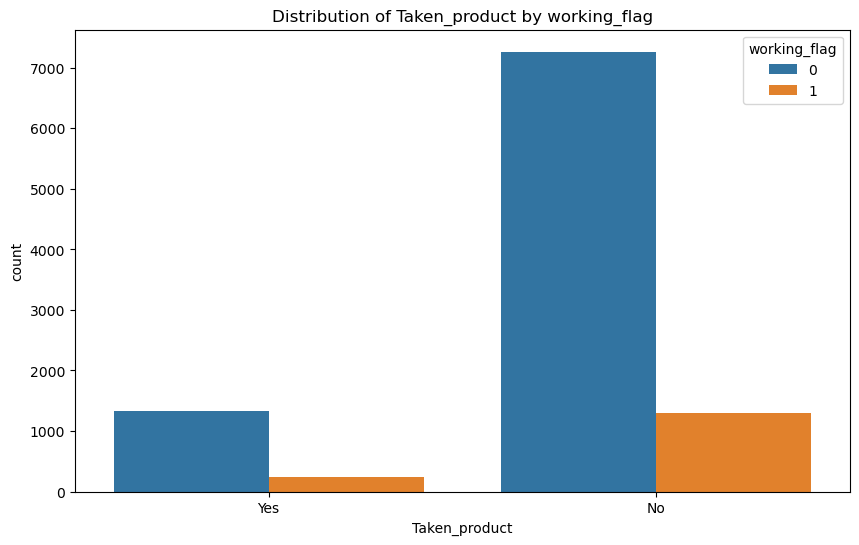

In [45]:
categorical_vars = ['working_flag']  # add other categorical variables

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=mobile_df, x='Taken_product', hue=var)
    plt.title(f'Distribution of Taken_product by {var}')
    plt.show()

#### Observation: When 0 is not employed and 1 is employed, as compared to the working person, the individual without work have taken product.


# compare the floats

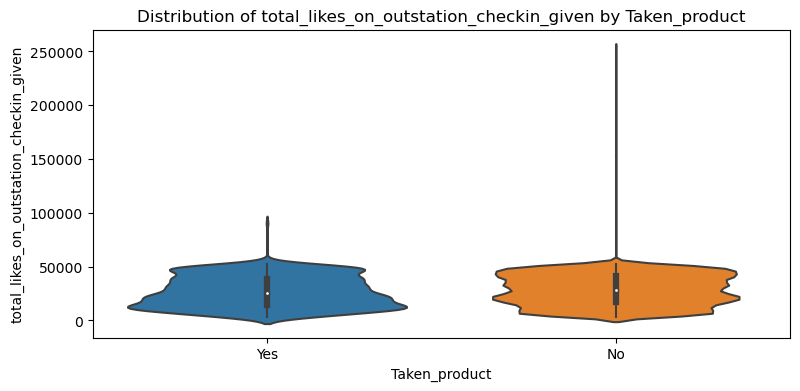

In [46]:
# List of numerical columns; modify this list to include the columns you're interested in
numerical_vars = ['total_likes_on_outstation_checkin_given']  # Add other numerical variables as needed

for var in numerical_vars:
    plt.figure(figsize=(9, 4))
    sns.violinplot(data=mobile_df, x='Taken_product', y=var)
    plt.title(f'Distribution of {var} by Taken_product')
    plt.show()


#### Observation: In the above context of comparison between x-axis Taken_product and y-axis total_likes_on_outstation_checkin_given, there are extreme variables in 'NO'as compared to 'YES'. We can also coclude that people who have taken the product (YES) have also liked the on checking.

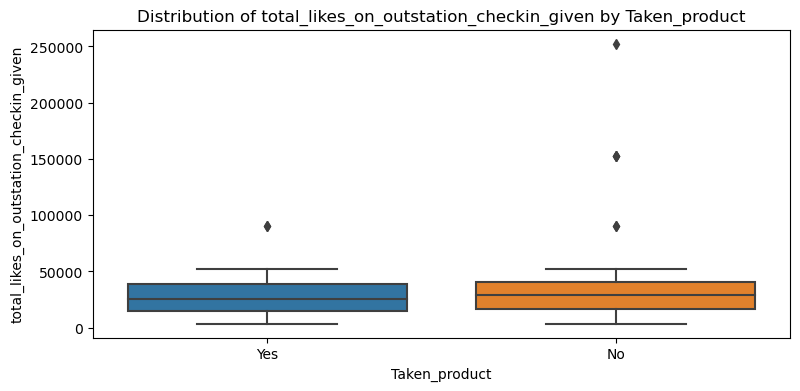

In [47]:
# List of numerical columns; modify this list to include the columns you're interested in
numerical_vars = ['total_likes_on_outstation_checkin_given']  # Add other numerical variables as needed

for var in numerical_vars:
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=mobile_df, x='Taken_product', y=var)
    plt.title(f'Distribution of {var} by Taken_product')
    plt.show()

/Users/priyankamishrapandey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x400 with 0 Axes>

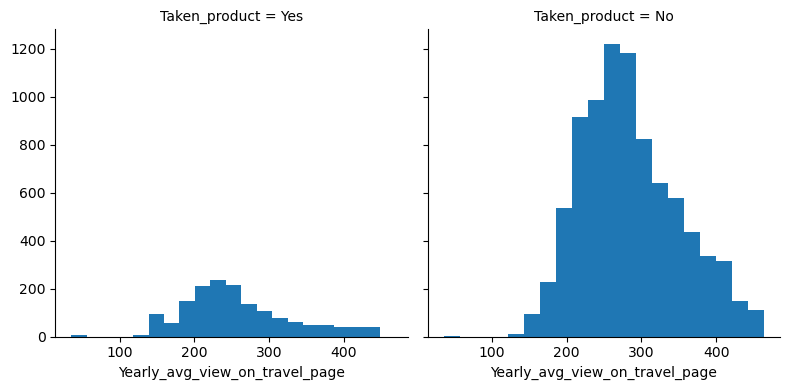

In [48]:
numerical_vars = ['Yearly_avg_view_on_travel_page']  
for var in numerical_vars:
    plt.figure(figsize=(9, 4))
    g = sns.FacetGrid(mobile_df, col='Taken_product', height=4)
g.map(plt.hist, var, bins=20)

# Observstion: in the above context, the person who has not taken the product has more yearly_avg_view_on_travel_page

/Users/priyankamishrapandey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x200 with 0 Axes>

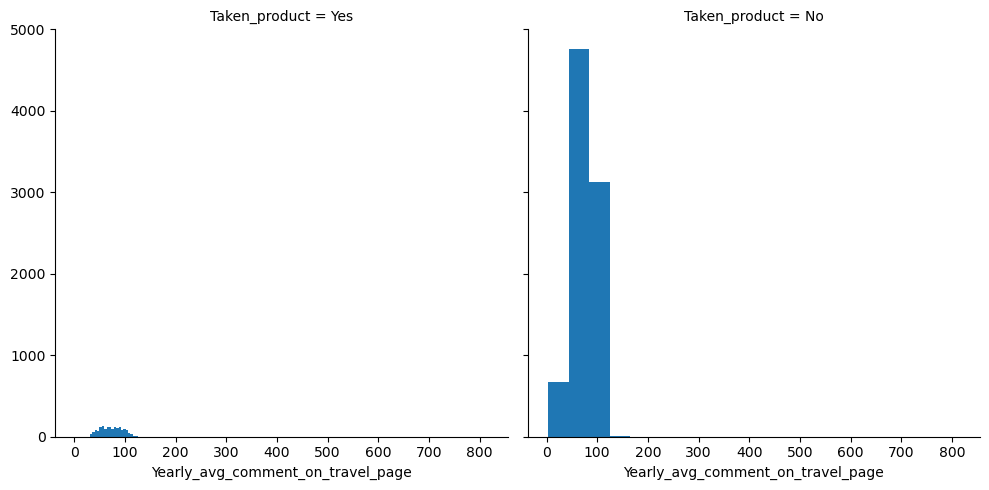

In [49]:
numerical_vars = ['Yearly_avg_comment_on_travel_page']  
for var in numerical_vars:
    plt.figure(figsize=(6, 2))
    g = sns.FacetGrid(mobile_df, col='Taken_product', height=5)
    g.map(plt.hist, var, bins=20)

#### Observation: people who have taken product have less comment on the oage as compared to the the people not taken the product

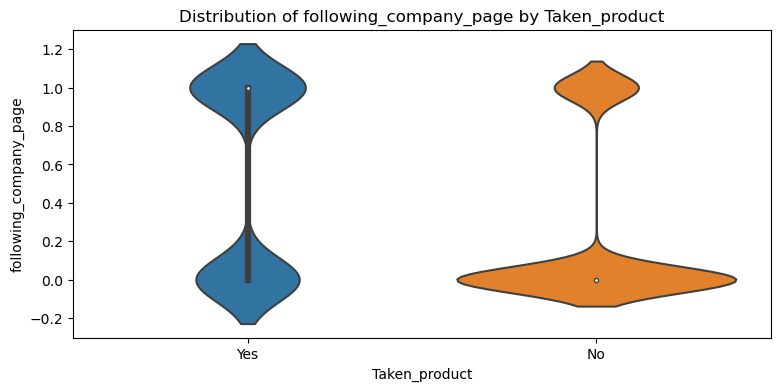

In [50]:
numerical_vars = ['following_company_page']  

for var in numerical_vars:
    plt.figure(figsize=(9, 4))
    sns.violinplot(data=mobile_df, x='Taken_product', y=var)
    plt.title(f'Distribution of {var} by Taken_product')
    plt.show()

#### Observation: in the above observation, the individual who is  following the company page, has average percentage of taking product 

/Users/priyankamishrapandey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


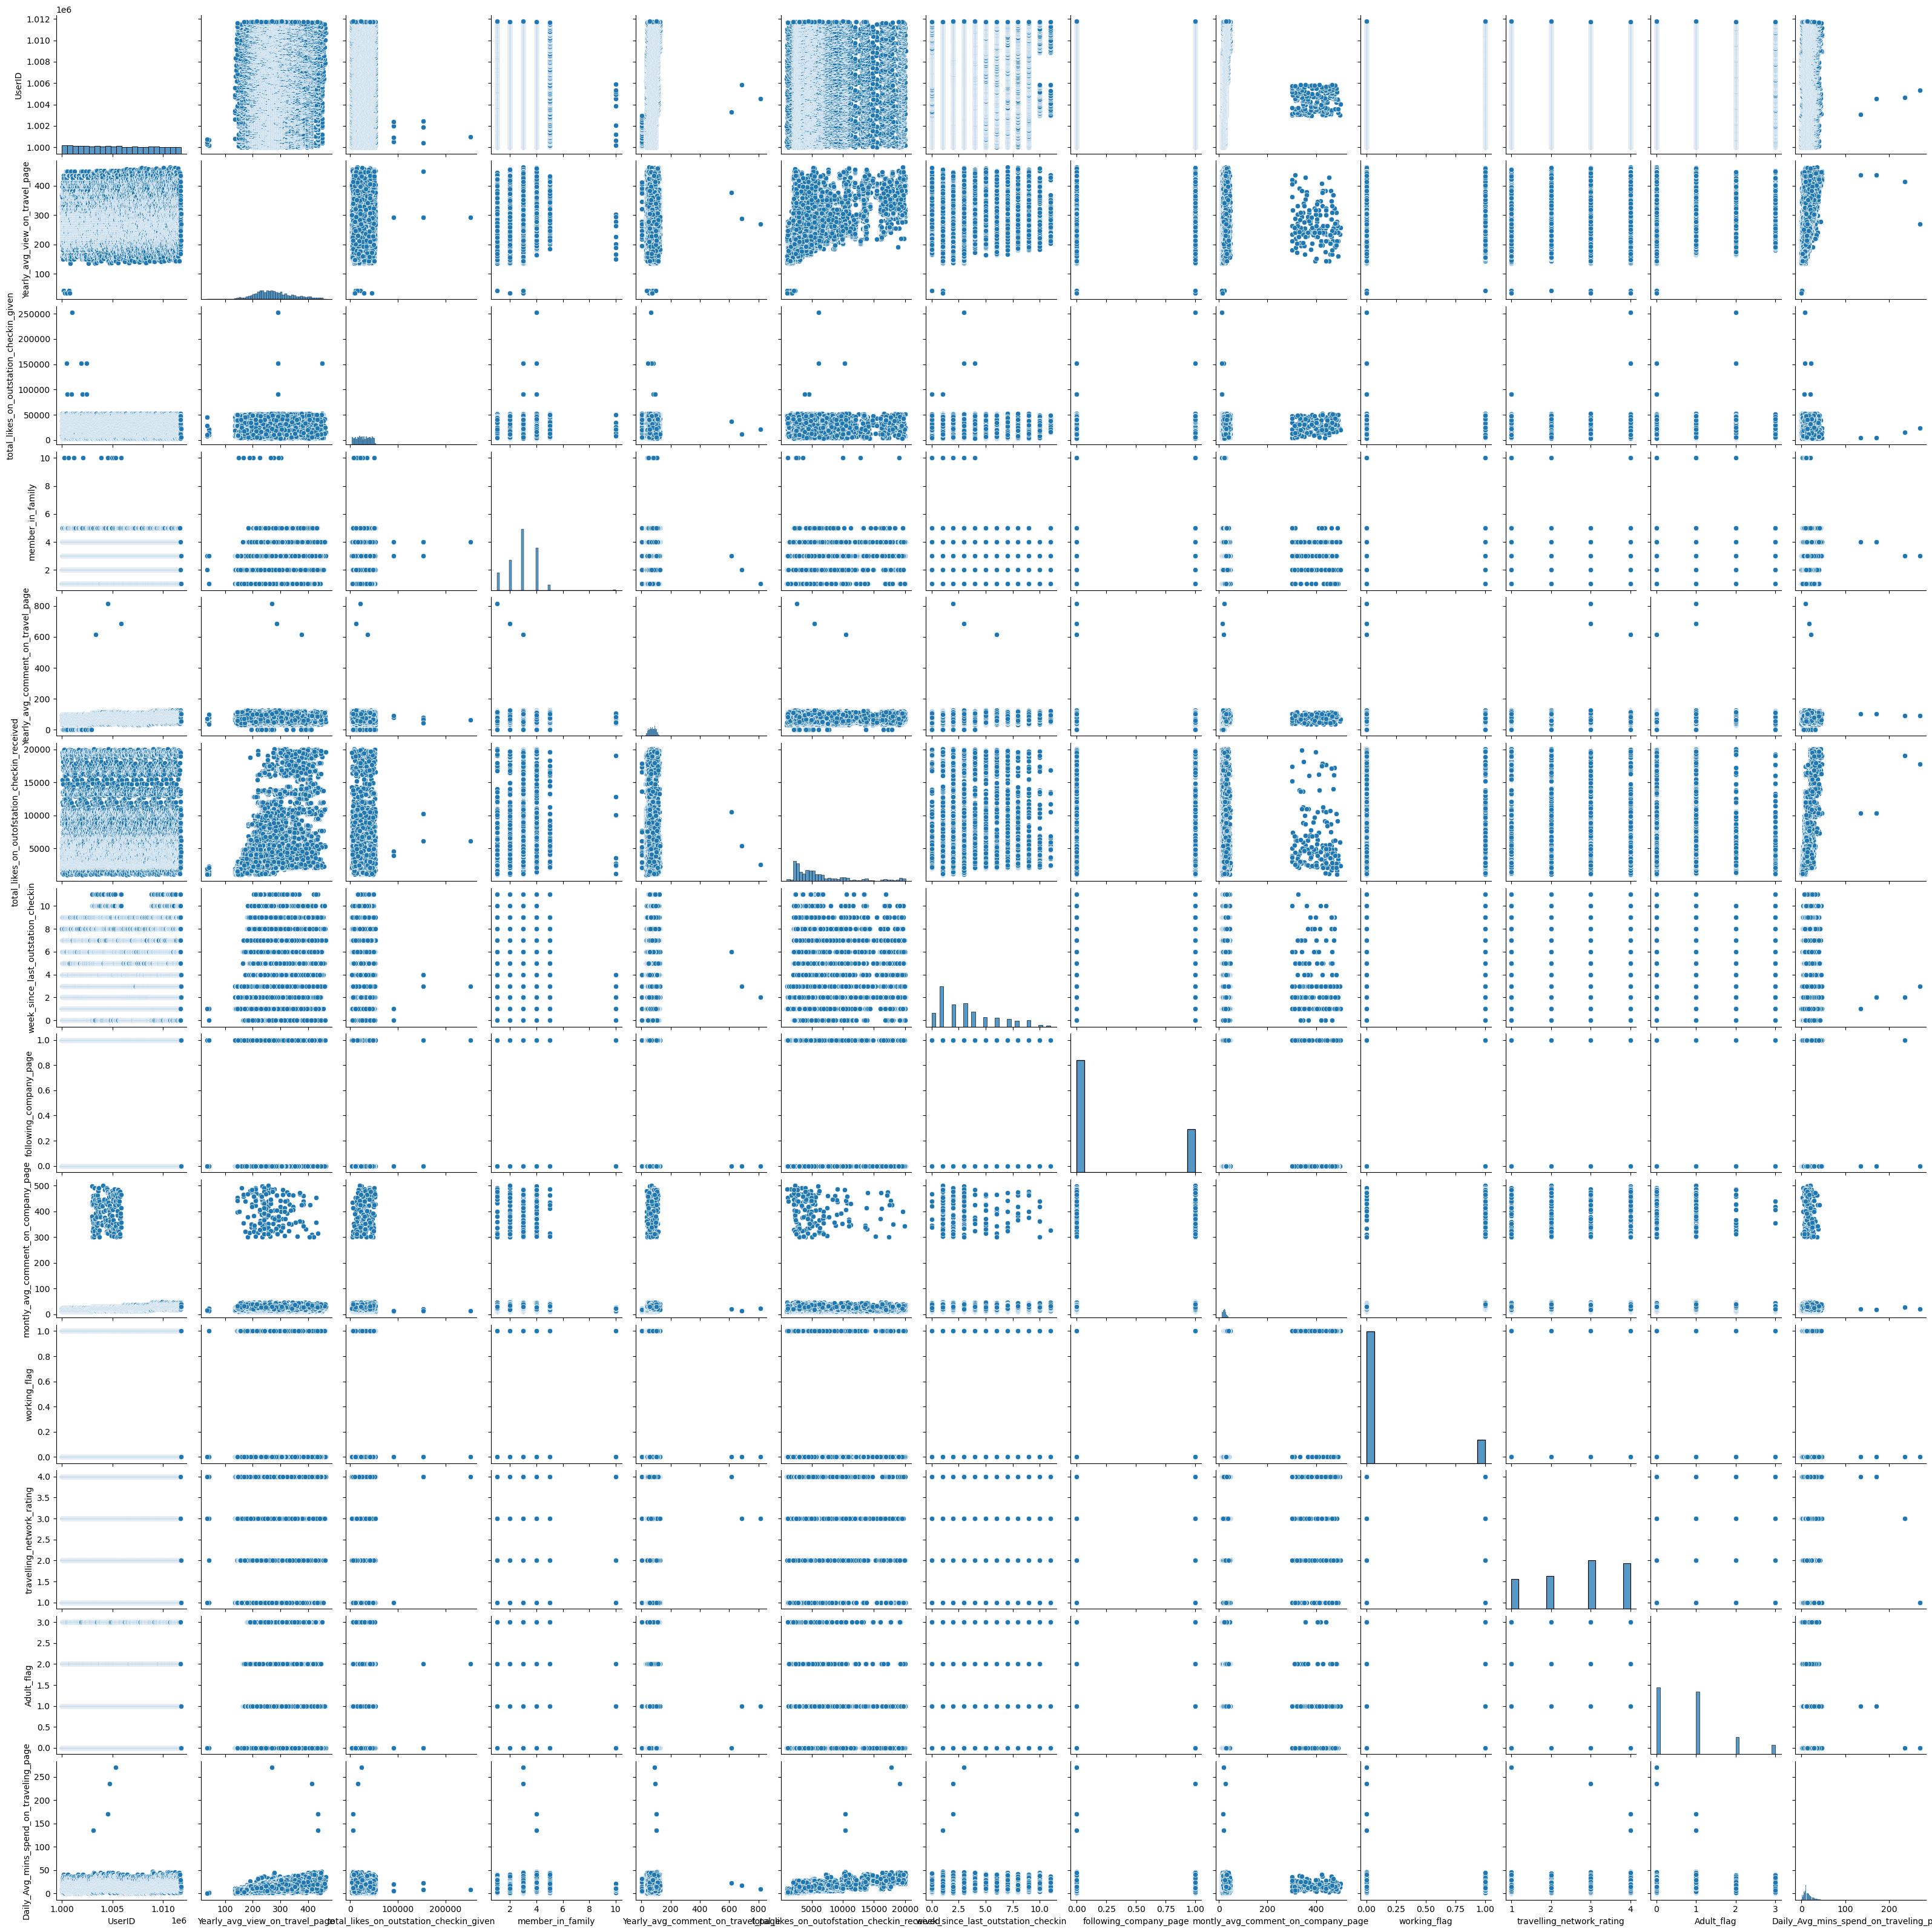

In [51]:
sns.pairplot(mobile_df)
plt.show()

In [58]:
print(mobile_df.columns)

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')


In [62]:
columns_to_convert = [
    'Yearly_avg_view_on_travel_page', 
    'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 
    'member_in_family', 'Yearly_avg_comment_on_travel_page', 
    'total_likes_on_outofstation_checkin_received', 
    'week_since_last_outstation_checkin', 'following_company_page', 
    'montly_avg_comment_on_company_page', 'working_flag', 
    'travelling_network_rating', 'Adult_flag', 
    'Daily_Avg_mins_spend_on_traveling_page'
]

for col in columns_to_convert:
    mobile_df[col] = mobile_df[col].astype('float64')
    

In [63]:
print(mobile_df.dtypes)


UserID                                            int64
Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                  float64
member_in_family                                float64
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received    float64
week_since_last_outstation_checkin              float64
following_company_page                          float64
montly_avg_comment_on_company_page              float64
working_flag                                    float64
travelling_network_rating                       float64
Adult_flag                                      float64
Daily_Avg_mins_spend_on_traveling_page          float64
dtype: object


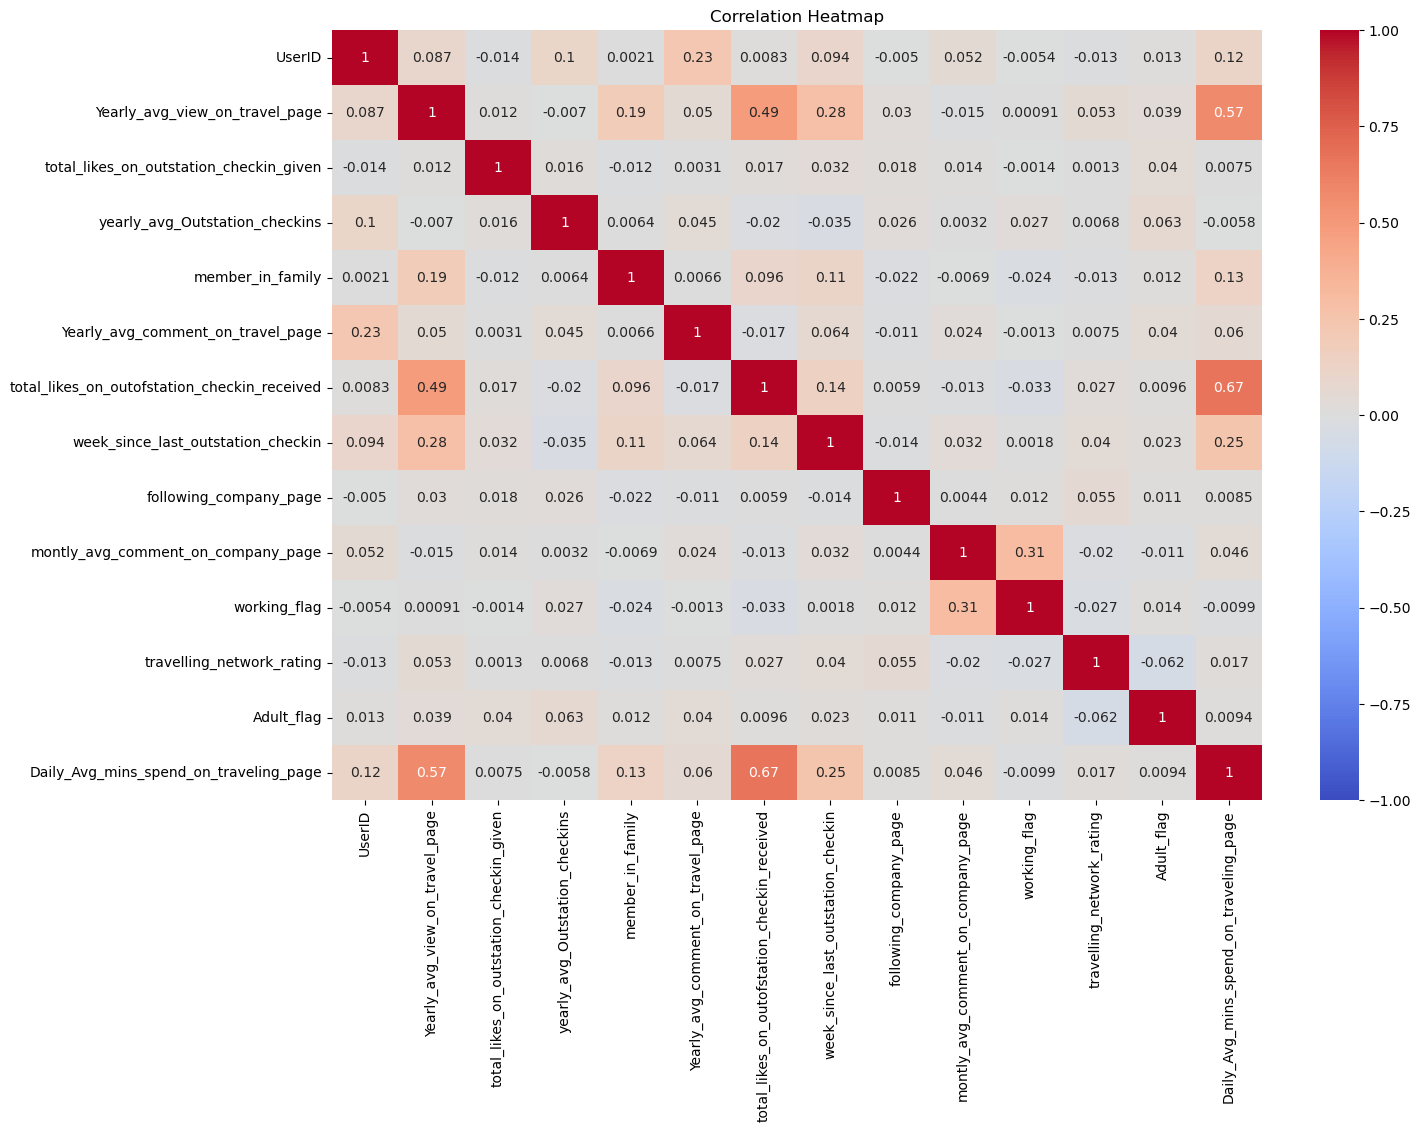

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns and compute correlation matrix
numeric_cols = mobile_df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()



#### OBSERVATION: As the highest correlation between the column (Daily_Avg_mins_spend _on_traveling_page) and (total_likes_on_outofstation_checkin_received) is 0.670814 which is a positive and moderate correlation we prefer not to remove any column.

# Performing EDA on Laptop data

In [75]:
print (laptop_df)

        UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
5881   1005882            No                           379.0           Laptop   
5883   1005884            No                           255.0           Laptop   
5885   1005886            No                           250.0           Laptop   
5888   1005889            No                           295.0           Laptop   
5906   1005907           Yes                           250.0           Laptop   
...        ...           ...                             ...              ...   
11730  1011731            No                           278.0           Laptop   
11742  1011743           Yes                           388.0           Laptop   
11746  1011747            No                           268.0           Laptop   
11755  1011756            No                           279.0           Laptop   
11758  1011759            No                           382.0           Laptop   

       total_likes_on_outst

In [77]:
laptop_df.describe() 

UserID  Yearly_avg_view_on_travel_page  \
count  1.108000e+03                     1108.000000   
mean   1.008813e+06                      282.130866   
std    1.696870e+03                       64.242174   
min    1.005882e+06                      138.000000   
25%    1.007351e+06                      237.000000   
50%    1.008820e+06                      270.500000   
75%    1.010290e+06                      325.000000   
max    1.011759e+06                      463.000000   

       total_likes_on_outstation_checkin_given  member_in_family  \
count                              1108.000000       1108.000000   
mean                              27769.664260          2.895307   
std                               13361.837042          1.044561   
min                                3818.000000          1.000000   
25%                               17650.250000          2.000000   
50%                               26942.500000          3.000000   
75%                               39380.250000          4.000000   
max                               52512.000000          5.000000   

       Yearly_avg_comment_on_travel_page  \
count                        1108.000000   
mean                           77.496390   
std                            21.039323   
min                            33.000000   
25%                            60.000000   
50%                            77.000000   
75%                            95.000000   
max                           125.000000   

       total_likes_on_outofstation_checkin_received  \
count                                   1108.000000   
mean                                    6226.317690   
std                                     4365.994064   
min                                     1098.000000   
25%                                     2884.000000   
50%                                     4759.500000   
75%                                     7979.500000   
max                                    19905.000000   

       week_since_last_outstation_checkin  following_company_page  \
count                         1108.000000             1108.000000   
mean                             2.998195                0.310469   
std                              2.493351                0.462895   
min                              0.000000                0.000000   
25%                              1.000000                0.000000   
50%                              2.000000                0.000000   
75%                              4.000000                1.000000   
max                             11.000000                1.000000   

       montly_avg_comment_on_company_page  working_flag  \
count                         1108.000000   1108.000000   
mean                            26.398917      0.166065   
std                              6.187063      0.372307   
min                             14.000000      0.000000   
25%                             22.000000      0.000000   
50%                             26.000000      0.000000   
75%                             31.000000      0.000000   
max                             46.000000      1.000000   

       travelling_network_rating   Adult_flag  \
count                1108.000000  1108.000000   
mean                    2.776173     0.765343   
std                     1.078864     0.828026   
min                     1.000000     0.000000   
25%                     2.000000     0.000000   
50%                     3.000000     1.000000   
75%                     4.000000     1.000000   
max                     4.000000     3.000000   

       Daily_Avg_mins_spend_on_traveling_page  
count                             1108.000000  
mean                                13.625451  
std                                  8.164610  
min                                  0.000000  
25%                                  8.000000  
50%                                 11.500000  
75%                                 18.000000  
max                            

# Univariate analysis

## Numerical Data:

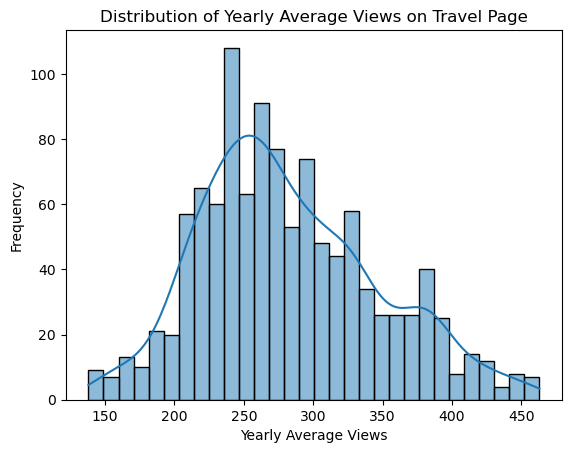

count    1108.000000
mean      282.130866
std        64.242174
min       138.000000
25%       237.000000
50%       270.500000
75%       325.000000
max       463.000000
Name: Yearly_avg_view_on_travel_page, dtype: float64


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(laptop_df['Yearly_avg_view_on_travel_page'], bins=30, kde=True)
plt.title('Distribution of Yearly Average Views on Travel Page')
plt.xlabel('Yearly Average Views')
plt.ylabel('Frequency')
plt.show()

# Summary Statistics
print(laptop_df['Yearly_avg_view_on_travel_page'].describe())


## observation: data is left skewed, similarly performimg it on other columns

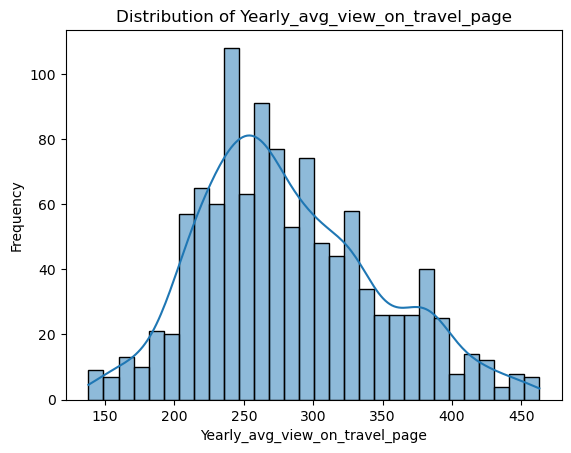

count    1108.000000
mean      282.130866
std        64.242174
min       138.000000
25%       237.000000
50%       270.500000
75%       325.000000
max       463.000000
Name: Yearly_avg_view_on_travel_page, dtype: float64


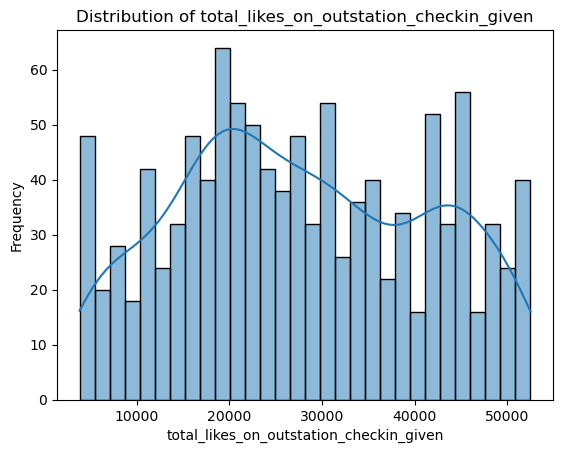

count     1108.000000
mean     27769.664260
std      13361.837042
min       3818.000000
25%      17650.250000
50%      26942.500000
75%      39380.250000
max      52512.000000
Name: total_likes_on_outstation_checkin_given, dtype: float64


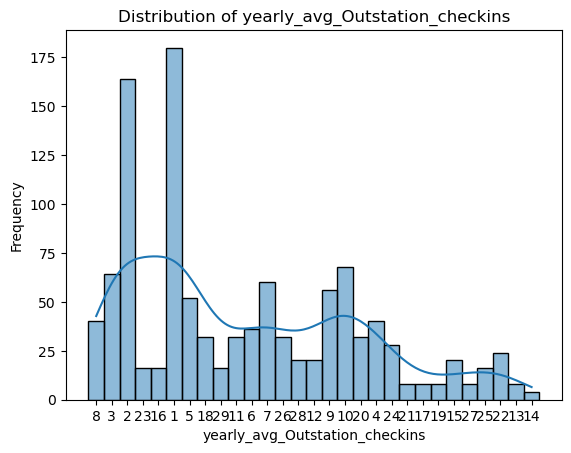

count     1108
unique      29
top          1
freq       180
Name: yearly_avg_Outstation_checkins, dtype: object


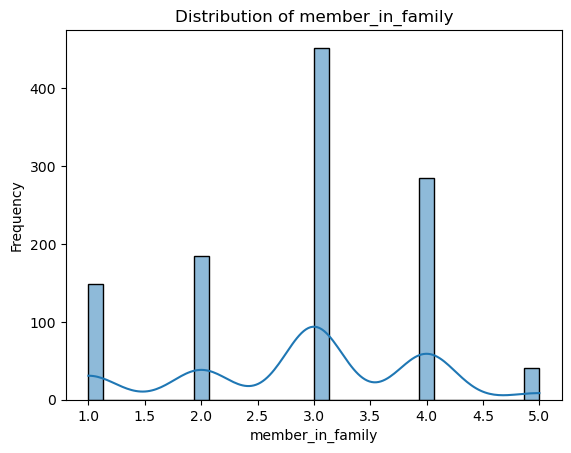

count    1108.000000
mean        2.895307
std         1.044561
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: member_in_family, dtype: float64


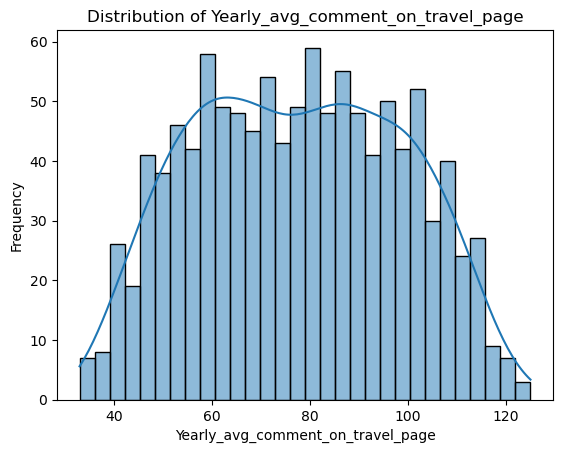

count    1108.000000
mean       77.496390
std        21.039323
min        33.000000
25%        60.000000
50%        77.000000
75%        95.000000
max       125.000000
Name: Yearly_avg_comment_on_travel_page, dtype: float64


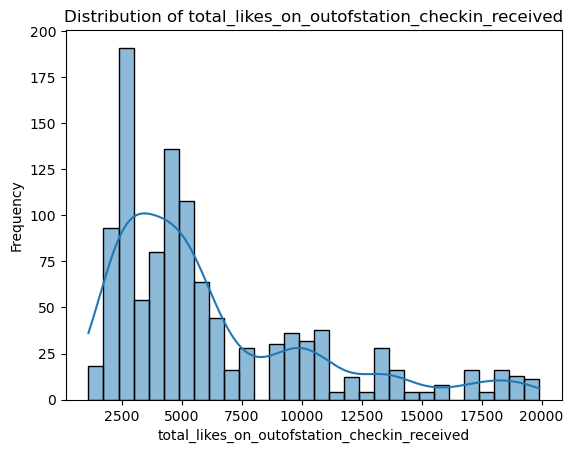

count     1108.000000
mean      6226.317690
std       4365.994064
min       1098.000000
25%       2884.000000
50%       4759.500000
75%       7979.500000
max      19905.000000
Name: total_likes_on_outofstation_checkin_received, dtype: float64


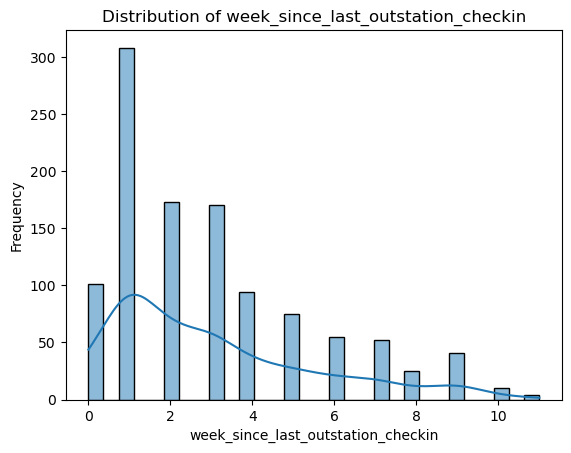

count    1108.000000
mean        2.998195
std         2.493351
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: week_since_last_outstation_checkin, dtype: float64


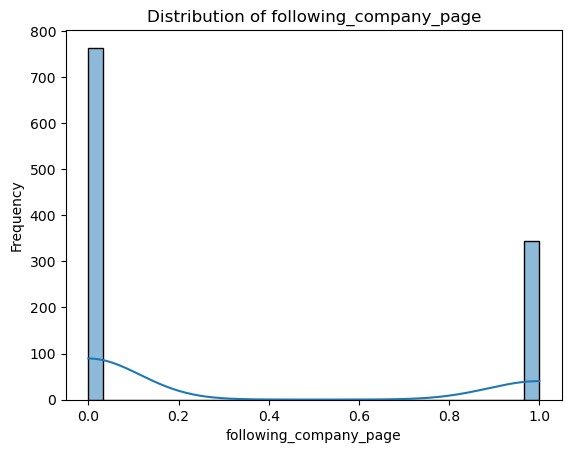

count    1108.000000
mean        0.310469
std         0.462895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: following_company_page, dtype: float64


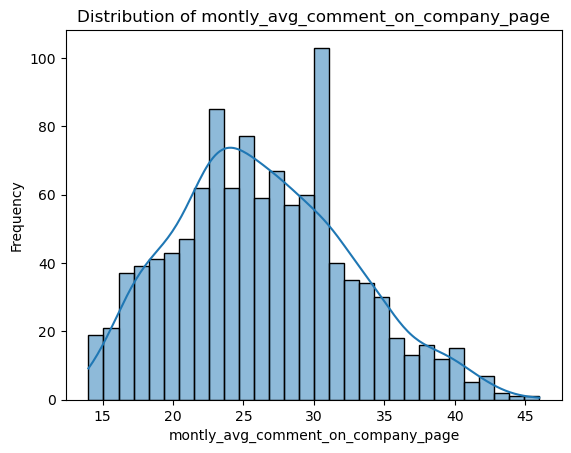

count    1108.000000
mean       26.398917
std         6.187063
min        14.000000
25%        22.000000
50%        26.000000
75%        31.000000
max        46.000000
Name: montly_avg_comment_on_company_page, dtype: float64


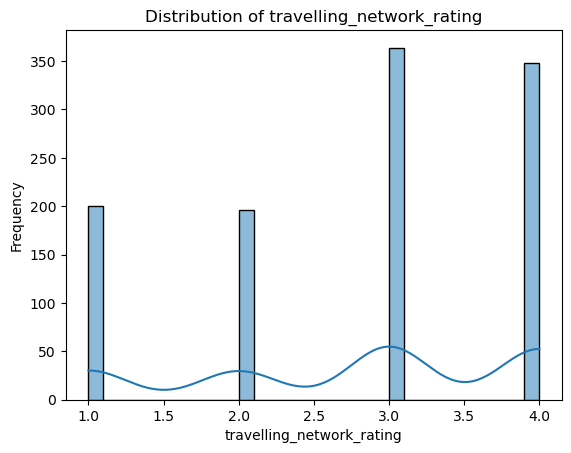

count    1108.000000
mean        2.776173
std         1.078864
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: travelling_network_rating, dtype: float64


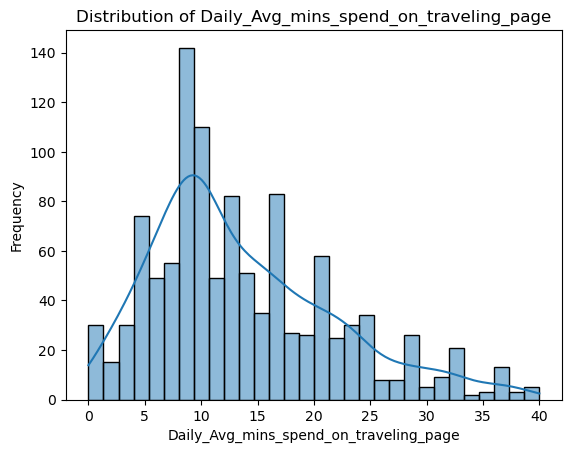

count    1108.000000
mean       13.625451
std         8.164610
min         0.000000
25%         8.000000
50%        11.500000
75%        18.000000
max        40.000000
Name: Daily_Avg_mins_spend_on_traveling_page, dtype: float64


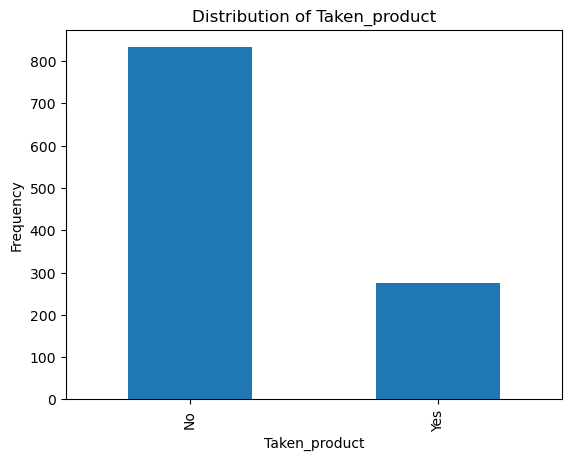

Taken_product
No     832
Yes    276
Name: count, dtype: int64


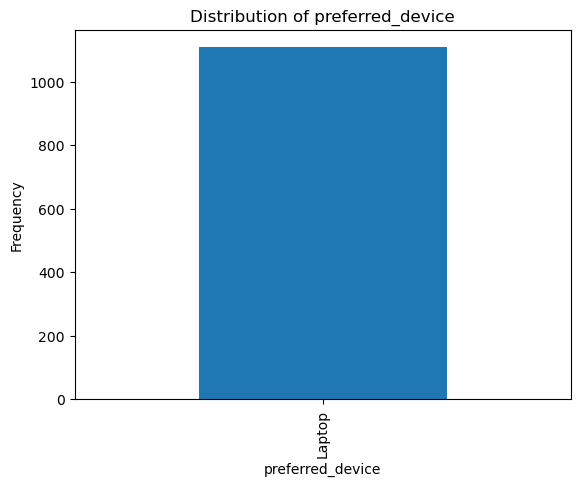

preferred_device
Laptop    1108
Name: count, dtype: int64


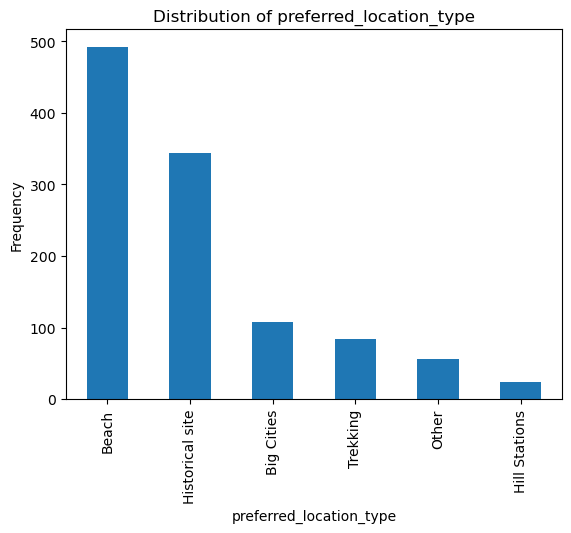

preferred_location_type
Beach              492
Historical site    344
Big Cities         108
Trekking            84
Other               56
Hill Stations       24
Name: count, dtype: int64


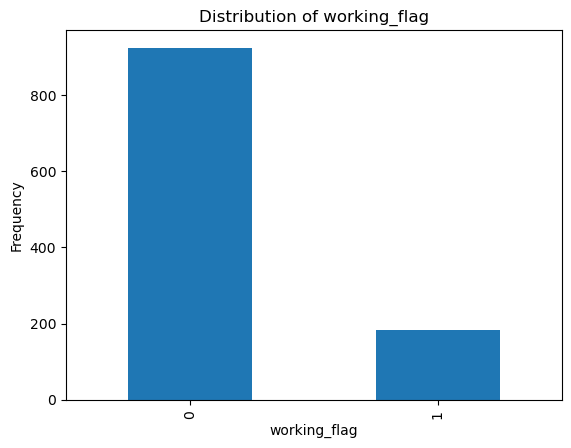

working_flag
0    924
1    184
Name: count, dtype: int64


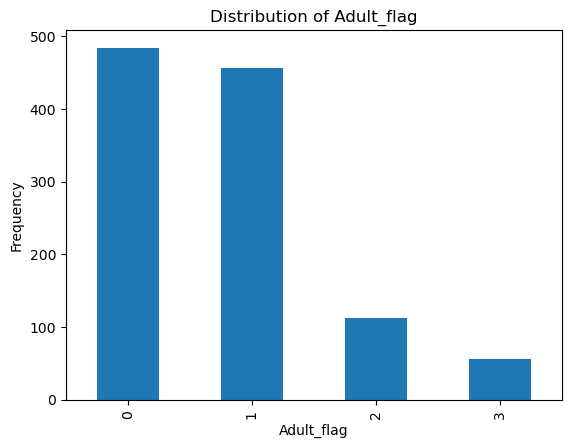

Adult_flag
0    484
1    456
2    112
3     56
Name: count, dtype: int64


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to analyze numerical columns
def analyze_numerical(column_name):
    # Histogram
    sns.histplot(laptop_df[column_name], bins=30, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()
    
    # Summary Statistics
    print(laptop_df[column_name].describe())

# Function to analyze categorical columns
def analyze_categorical(column_name):
    # Bar chart
    laptop_df[column_name].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()
    
    # Frequency Distribution
    print(laptop_df[column_name].value_counts())

# Now let's call the functions on our columns:

# Numerical Columns
numerical_columns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'member_in_family',
                     'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 
                     'following_company_page', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']

for col in numerical_columns:
    analyze_numerical(col)

# Categorical Columns
categorical_columns = ['Taken_product', 'preferred_device', 'preferred_location_type', 'working_flag', 'Adult_flag']

for col in categorical_columns:
    analyze_categorical(col)


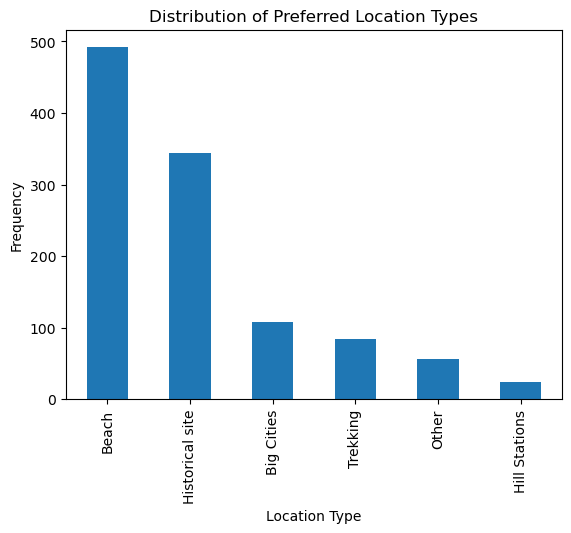

preferred_location_type
Beach              492
Historical site    344
Big Cities         108
Trekking            84
Other               56
Hill Stations       24
Name: count, dtype: int64


In [89]:
# Bar chart
laptop_df['preferred_location_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Preferred Location Types')
plt.xlabel('Location Type')
plt.ylabel('Frequency')
plt.show()

# Frequency Distribution
print(laptop_df['preferred_location_type'].value_counts())


## Beach has more users than any other category

# Bivariate Analysis

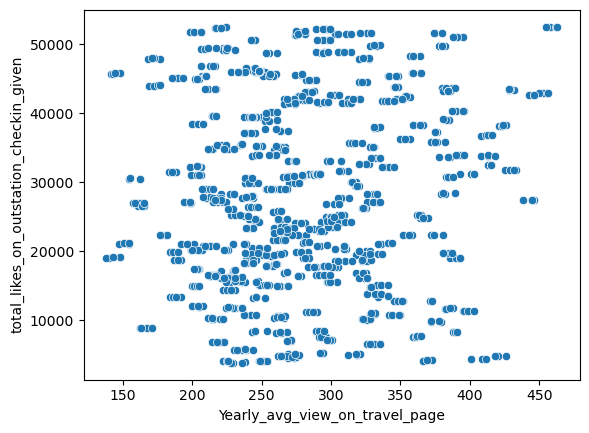

Correlation Coefficient: 0.08345432136578208


In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical vs. Numerical
sns.scatterplot(data=laptop_df, x='Yearly_avg_view_on_travel_page', y='total_likes_on_outstation_checkin_given')
plt.show()

correlation_coefficient = laptop_df['Yearly_avg_view_on_travel_page'].corr(laptop_df['total_likes_on_outstation_checkin_given'])
print(f"Correlation Coefficient: {correlation_coefficient}")

#### Observation: A high absolute value of the correlation coefficient indicates a strong relationship.
##### A correlation of  0.0834 indicates a weak positive linear relationship between the two variables. However, always remember that correlation does not imply causation. Even if two variables are correlated, it does not mean that changes in one variable cause changes in the other.







# Categorical vs. Categorical

In [80]:
cross_tab = pd.crosstab(laptop_df['Taken_product'], laptop_df['preferred_location_type'])
print(cross_tab)

preferred_location_type  Beach  Big Cities  Hill Stations  Historical site  \
Taken_product                                                                
No                         364          76             12              292   
Yes                        128          32             12               52   

preferred_location_type  Other  Trekking  
Taken_product                             
No                          44        44  
Yes                         12        40  


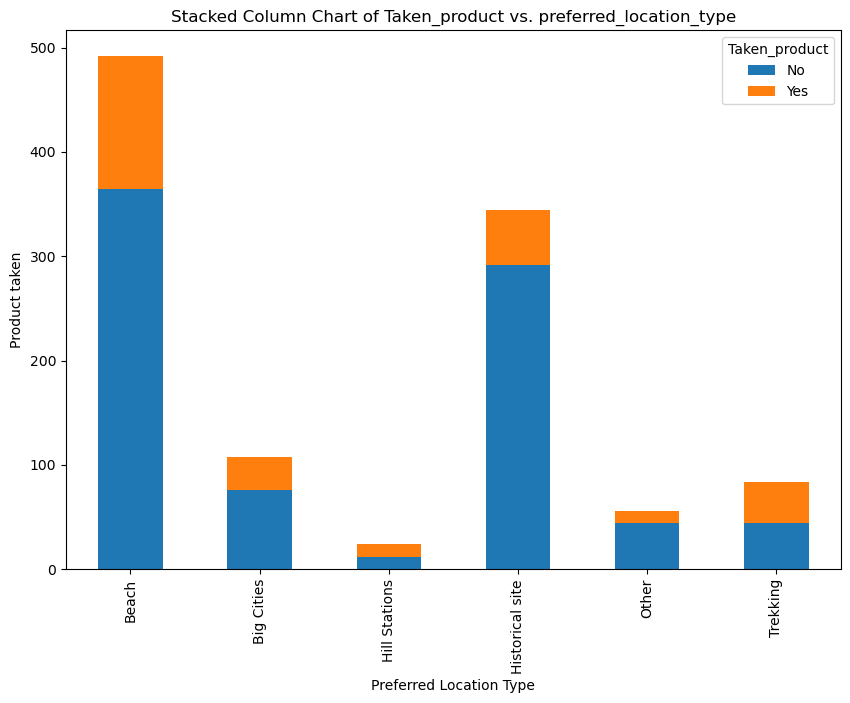

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(laptop_df['preferred_location_type'], laptop_df['Taken_product'])

# Plotting the stacked column chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Stacked Column Chart of Taken_product vs. preferred_location_type')
plt.ylabel('Product taken')
plt.xlabel('Preferred Location Type')
plt.show()


#### Observation: Product taken by beach user is highest followed by historical site, trekking, big cities,hill stations and then other

In [82]:
import pandas as pd
from scipy import stats


# Create a contingency table
contingency_table = pd.crosstab(laptop_df['Taken_product'], laptop_df['preferred_location_type'])

print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(expected)

# Interpretation
if p_val < 0.05:
    print("\nThere's a statistically significant association between 'Taken_product' and 'preferred_location_type'.")
else:
    print("\nThere's no statistically significant association between 'Taken_product' and 'preferred_location_type'.")


Contingency Table:
preferred_location_type  Beach  Big Cities  Hill Stations  Historical site  \
Taken_product                                                                
No                         364          76             12              292   
Yes                        128          32             12               52   

preferred_location_type  Other  Trekking  
Taken_product                             
No                          44        44  
Yes                         12        40  

Chi-square Statistic: 50.8474224193344
P-value: 9.294102461895726e-10
Degrees of Freedom: 5

Expected Frequencies Table:
[[369.44404332  81.09747292  18.02166065 258.31046931  42.05054152
   63.07581227]
 [122.55595668  26.90252708   5.97833935  85.68953069  13.94945848
   20.92418773]]

There's a statistically significant association between 'Taken_product' and 'preferred_location_type'.


### A p-value less than 0.05 typically indicates that there's a statistically significant association between the two categorical variables.

# Numerical vs. Categorical

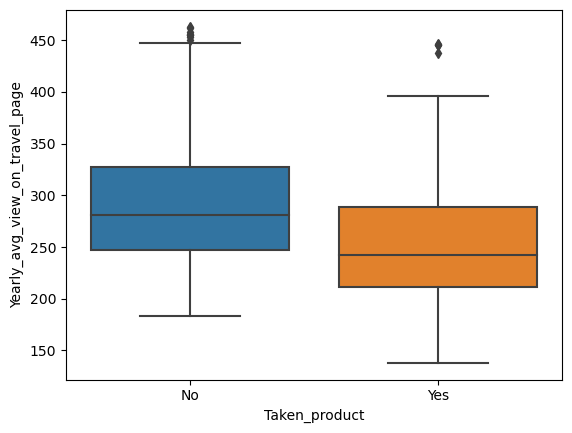

In [81]:

sns.boxplot(data=laptop_df, x='Taken_product', y='Yearly_avg_view_on_travel_page')
plt.show()

##### Observation : Audience whoa has taken product are having lower views on travel page, also this data has outliers

## performing T-test

In [79]:
import pandas as pd
from scipy import stats


# Assuming 'Taken_product' has only two categories: 'Yes' and 'No'
group1 = laptop_df[laptop_df['Taken_product'] == 'Yes']['Yearly_avg_view_on_travel_page']
group2 = laptop_df[laptop_df['Taken_product'] == 'No']['Yearly_avg_view_on_travel_page']

# Perform a t-test
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("The means of 'Yearly_avg_view_on_travel_page' for the two groups are statistically different.")
else:
    print("The means of 'Yearly_avg_view_on_travel_page' for the two groups are not statistically different.")


T-statistic: -8.32962576198444
P-value: 2.375925355516304e-16
The means of 'Yearly_avg_view_on_travel_page' for the two groups are statistically different.


#### Obeservation: This will give you the t-statistic and the p-value. If the p-value is less than 0.05 (assuming a 5% significance level), you would reject the null hypothesis and conclude that there's a statistically significant difference in the yearly average view on the travel page between those who have taken the product and those who haven't.

# Perfroming Multivariate analysis on Laptop_df

# Correlation Matrix:

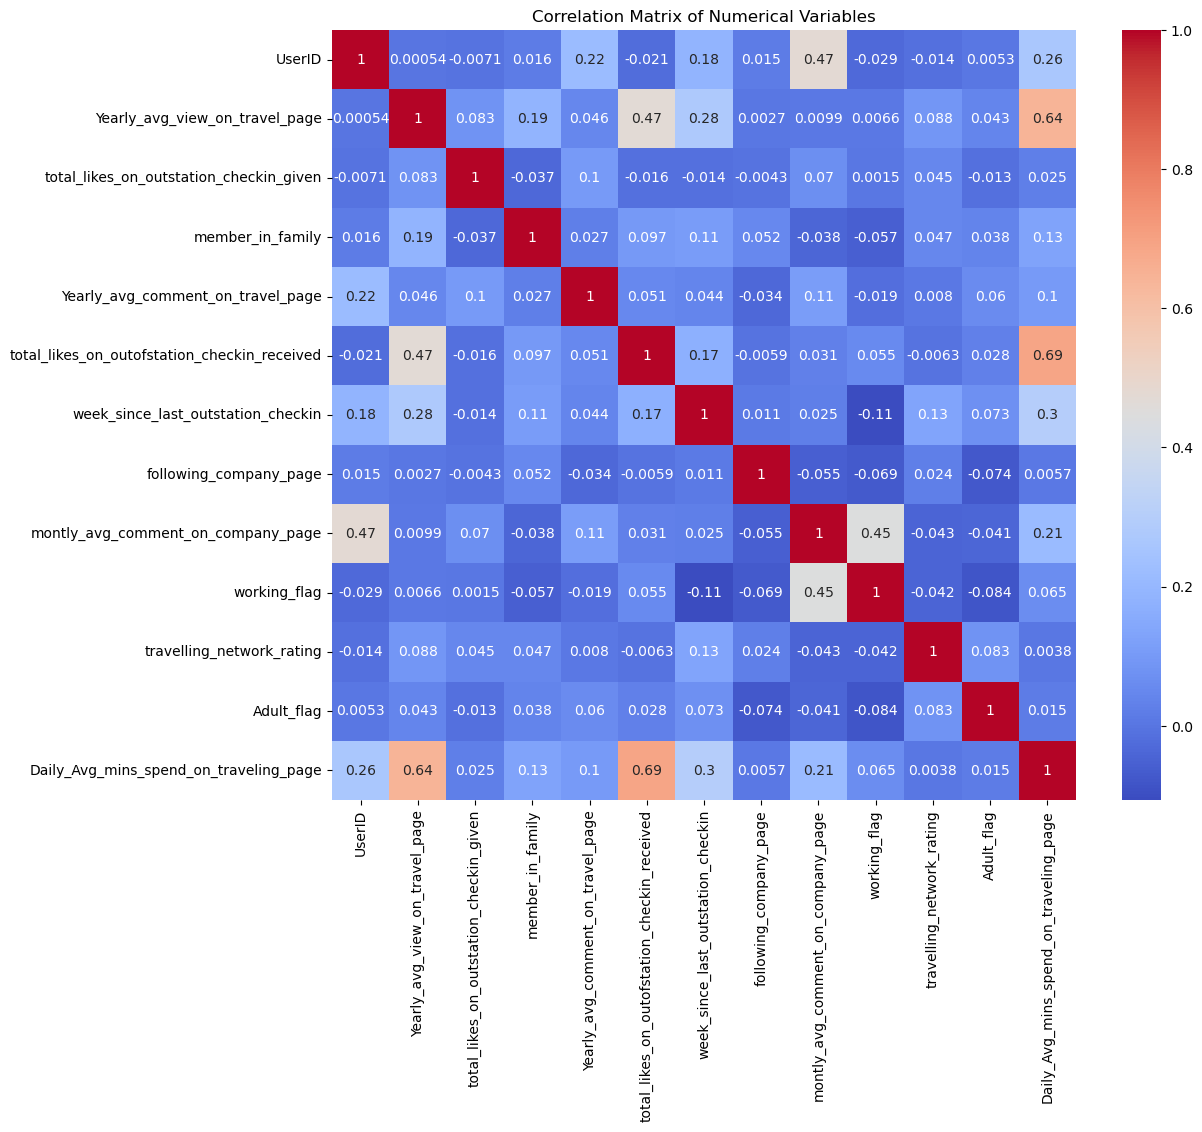

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract only numeric columns
numeric_cols = laptop_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation for numeric columns
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


## Observation:  Daily avg mins spend on travelling page and total likes on out station checking received has highest correaltion of 0.69

# Pair Plot:

/Users/priyankamishrapandey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


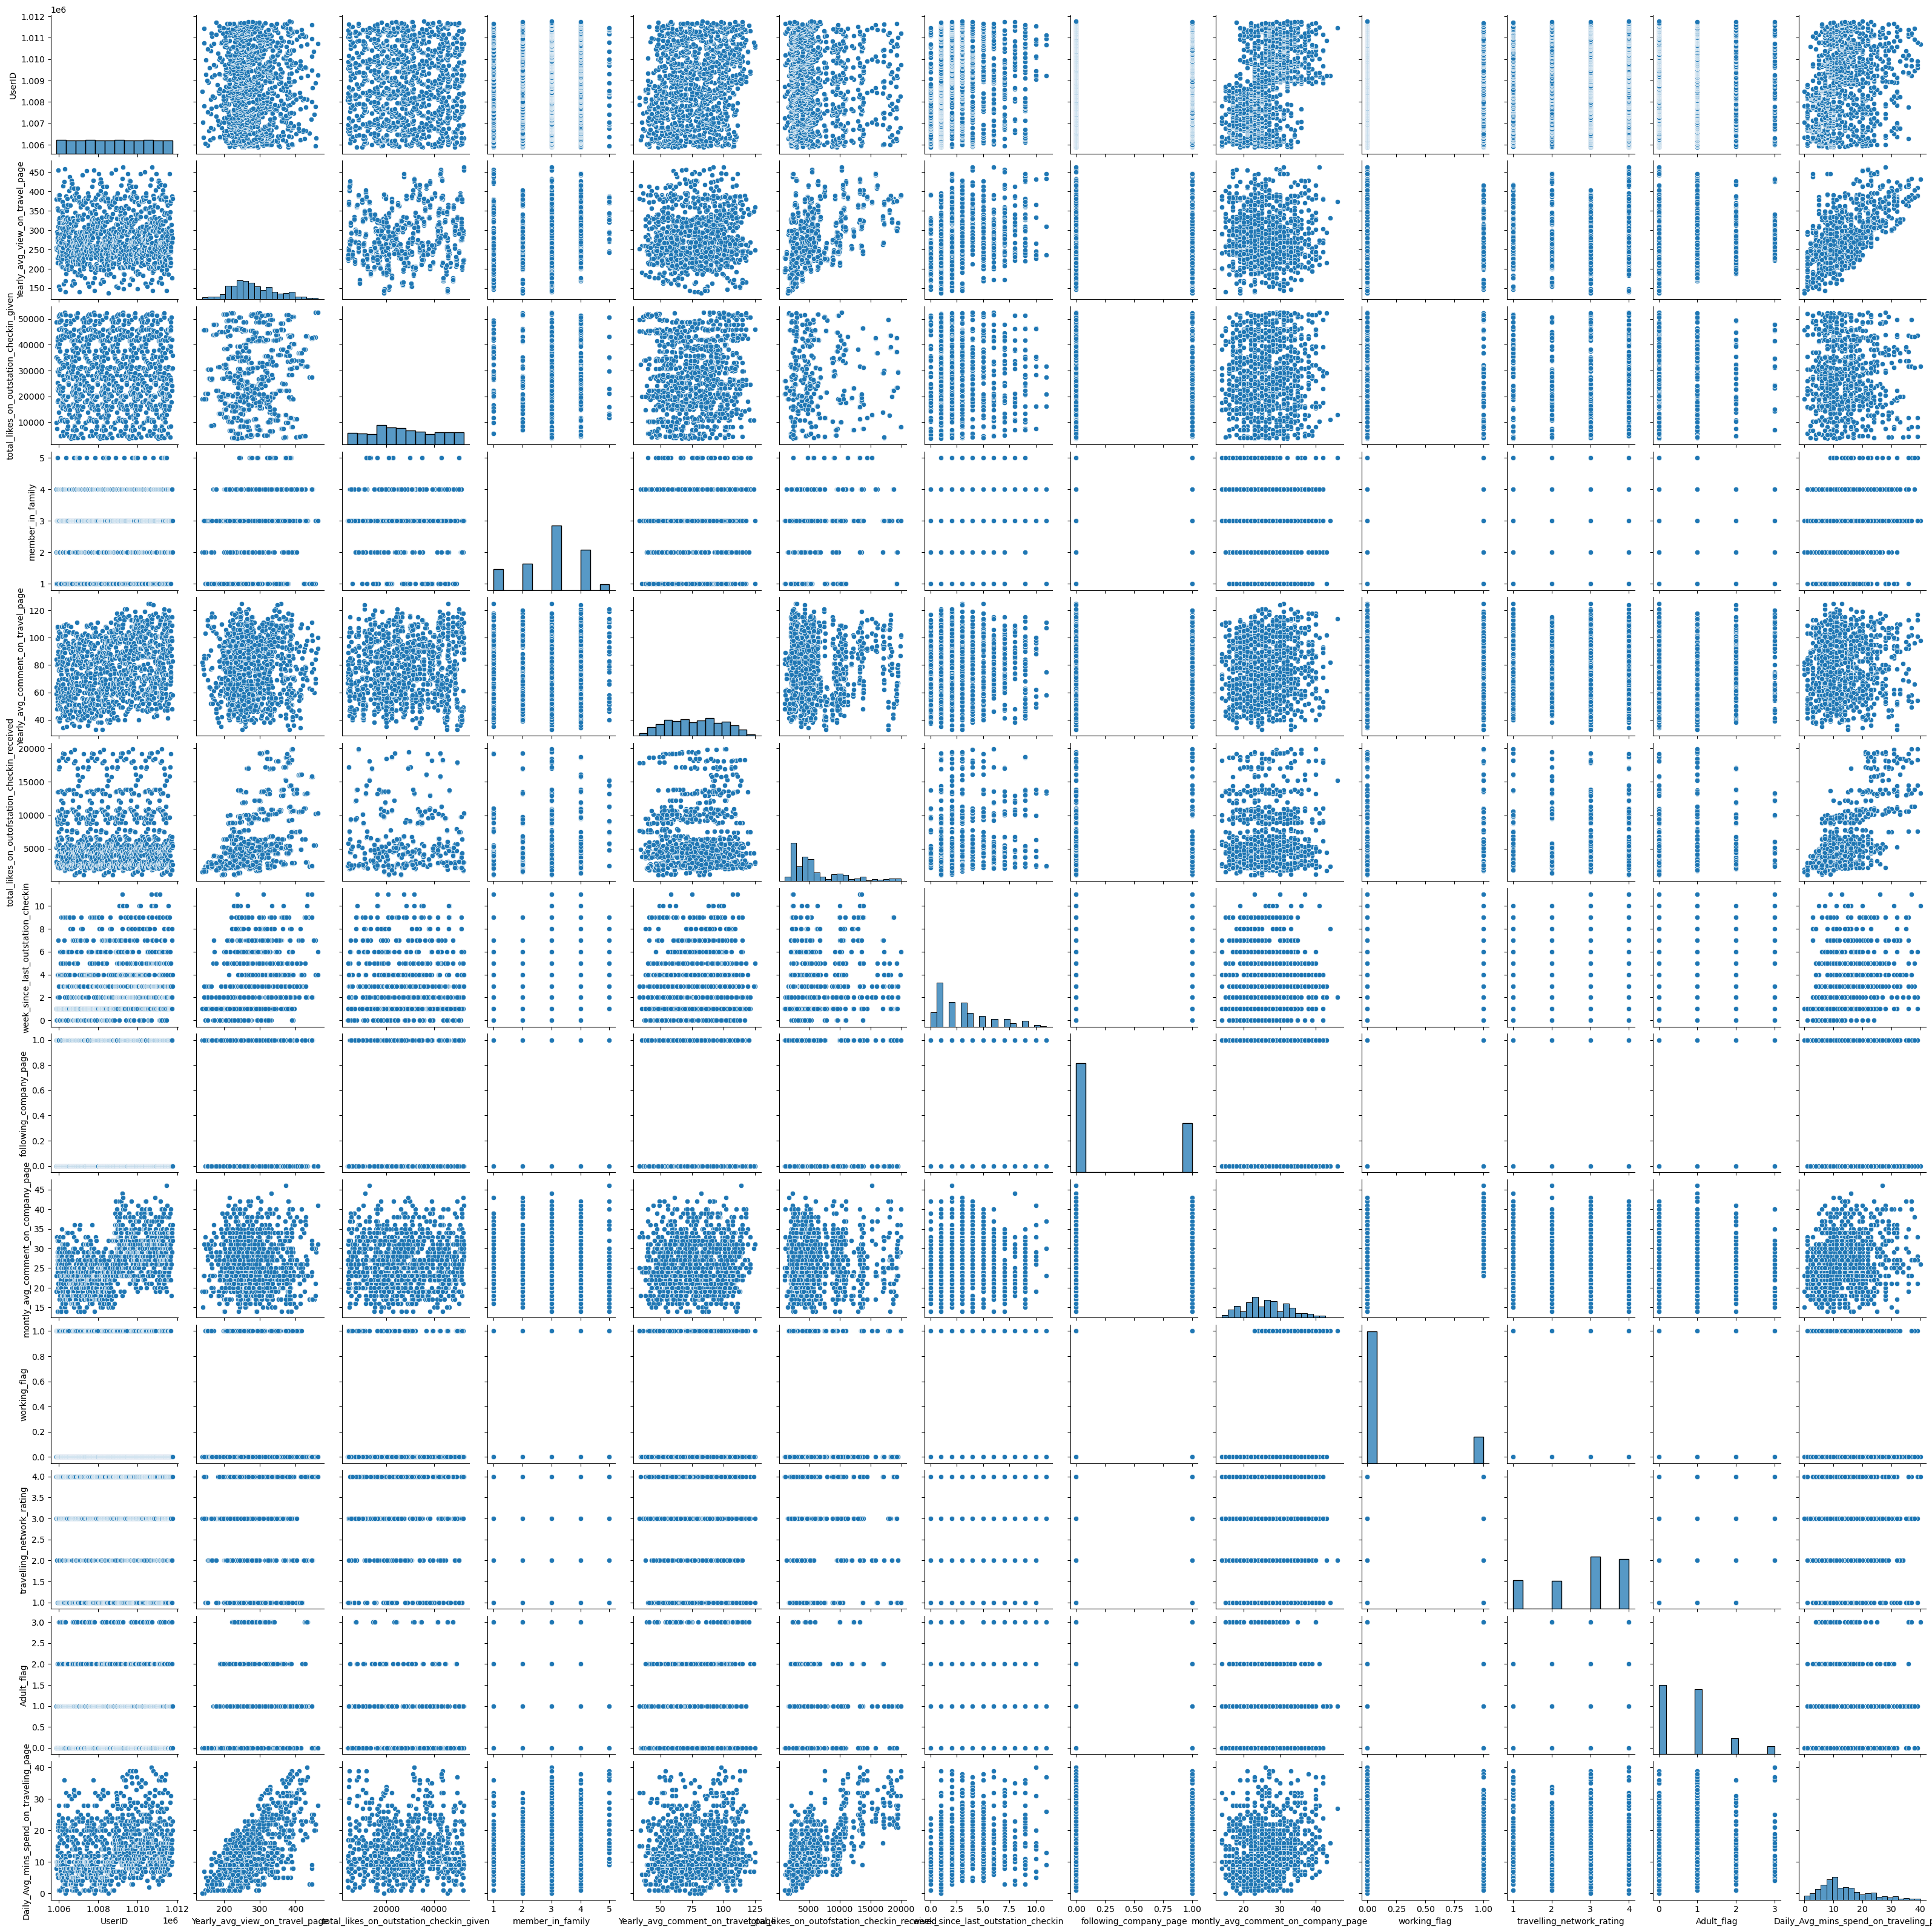

In [96]:
sns.pairplot(laptop_df)
plt.show()

##### Observation: 

# Categorical vs Numerical:

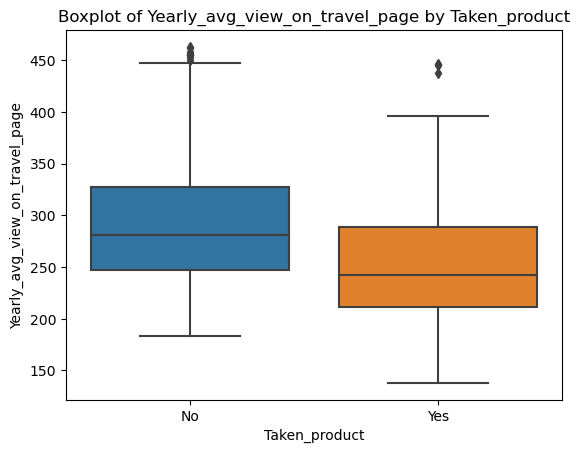

In [97]:
sns.boxplot(data=laptop_df, x='Taken_product', y='Yearly_avg_view_on_travel_page')
plt.title('Boxplot of Yearly_avg_view_on_travel_page by Taken_product')
plt.show()


#### Observation:  Yearly avg view on travel page by audience who has taken the product has outliers

# Categorical vs Categorical:

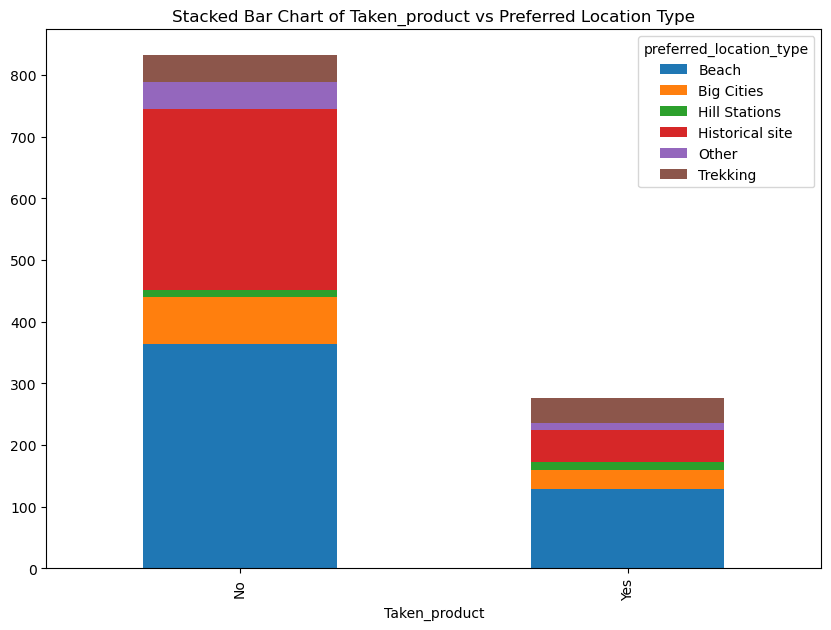

In [98]:
contingency_table = pd.crosstab(laptop_df['Taken_product'], laptop_df['preferred_location_type'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Stacked Bar Chart of Taken_product vs Preferred Location Type')
plt.show()


## Observation: Product taken by audience who belongs to beach category are higher than historical sites, then trekking followed by big cities, hill stations and others

###### We can conclude that laptop users are taking product more recreation purposes

# Numerical vs Numerical vs Categorical:

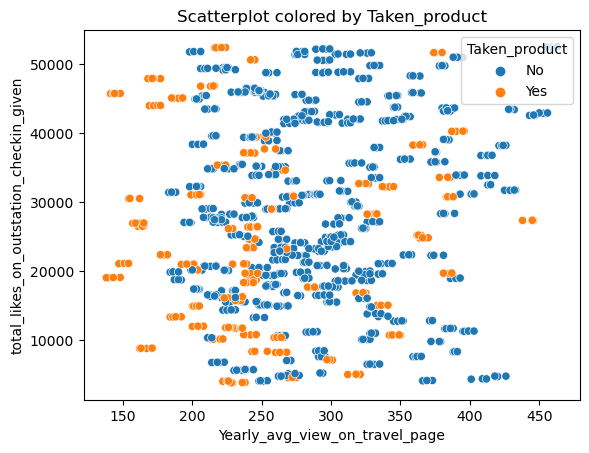

In [99]:
sns.scatterplot(data=laptop_df, x='Yearly_avg_view_on_travel_page', y='total_likes_on_outstation_checkin_given', hue='Taken_product')
plt.title('Scatterplot colored by Taken_product')
plt.show()

# Dimensionality Reduction (like PCA)

In [113]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Data Preprocessing

# Remove non-numeric columns
numeric_cols = laptop_df.select_dtypes(include=['float64', 'int64'])
data_standardized = StandardScaler().fit_transform(numeric_cols)

s = pca.fit_transform(data_standardized)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data = principal_components, columns = [f'PC{i+1}' for i in range(len(numeric_cols.columns))])

#Apply PCA

In [114]:
pca = PCA()
principal_components = pca.fit_transform(data_standardized)

#Visualization

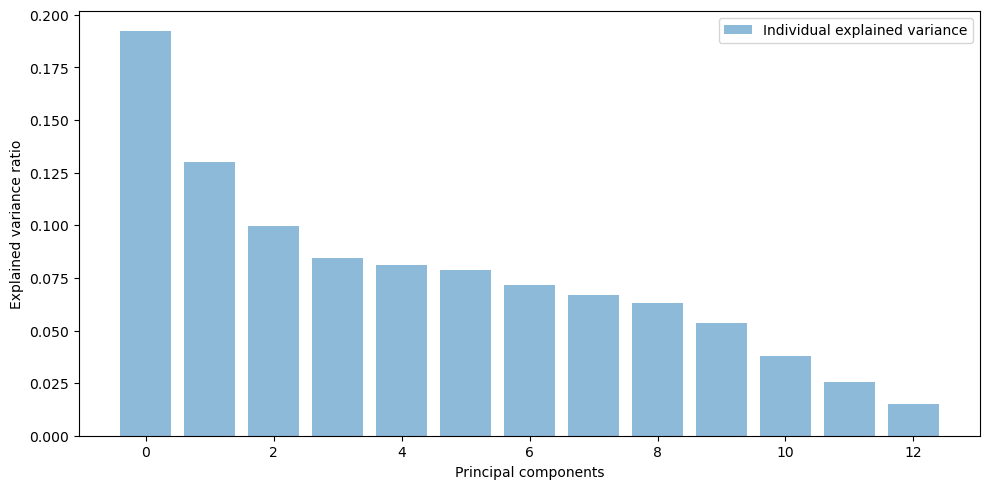

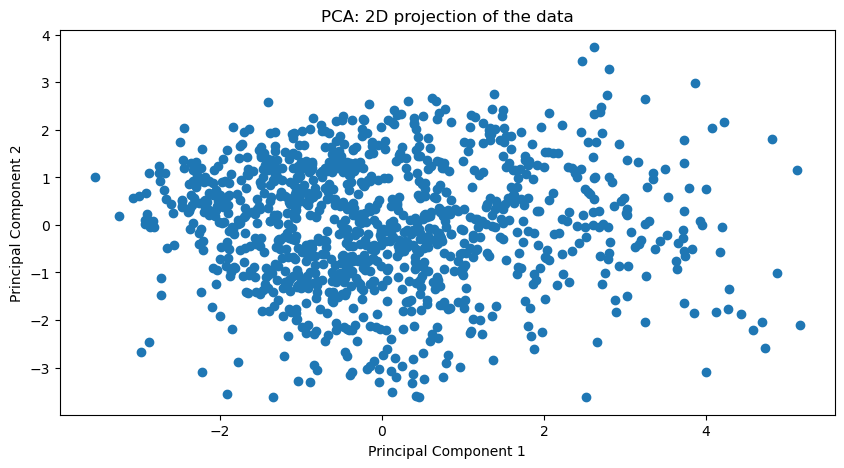

In [115]:

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

# Visualization in the first two principal components
plt.figure(figsize=(10, 5))
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.title('PCA: 2D projection of the data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##### Observation: 